In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

/home/kko1/.pyenv/versions/3.8.19/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/kko1/.pyenv/versions/3.8.19/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/home/kko1/.pyen

Running scvelo 0.3.2 (python 3.8.19) on 2025-07-15 12:40.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.8 anndata==0.9.2 umap==0.5.6 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.11.8 pynndescent==0.5.13


In [3]:
import os
os.chdir('/mnt/d/KP/EKP_RKP')

In [4]:
import scanpy.external as sce

In [88]:
adata = sc.read('T_cell.h5ad')
adata

AnnData object with n_obs × n_vars = 699 × 16462
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'tissue_1', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'celltype'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'celltype_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_rank_fgsea', 'neighbors', 'pca', 'tissue_1_colors', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

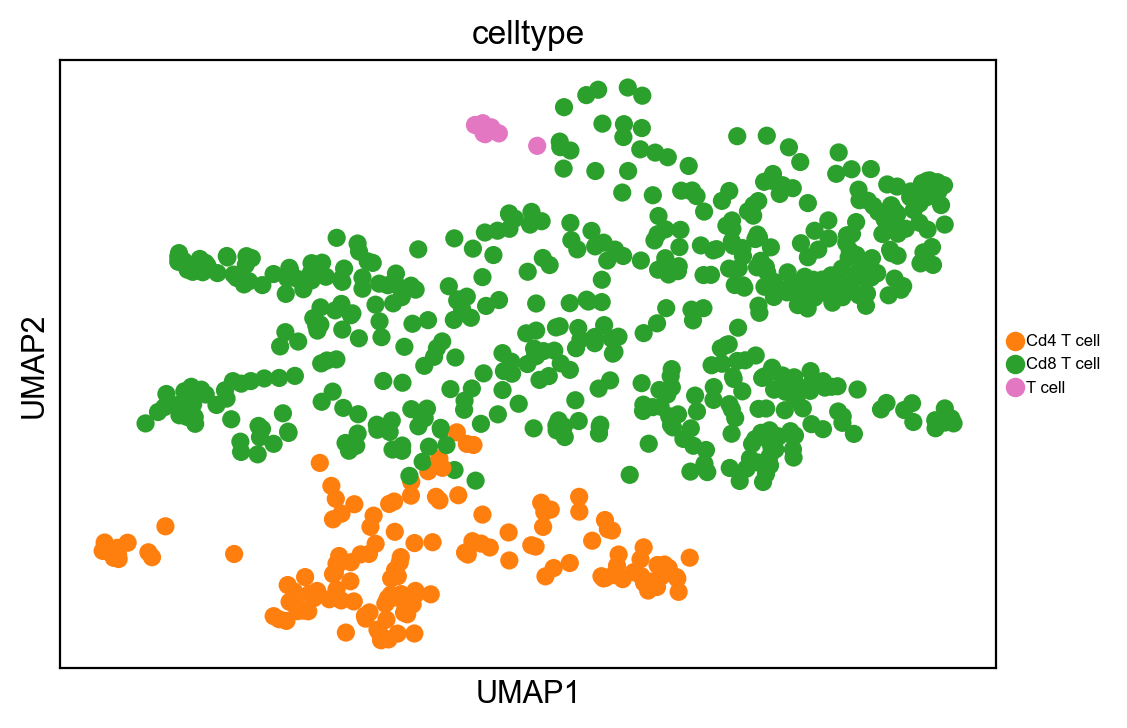

In [89]:
sc.pl.umap(adata, color=['celltype'], legend_loc='right margin', legend_fontsize=6)#, save='_Immune_cells_by_celltype.pdf')

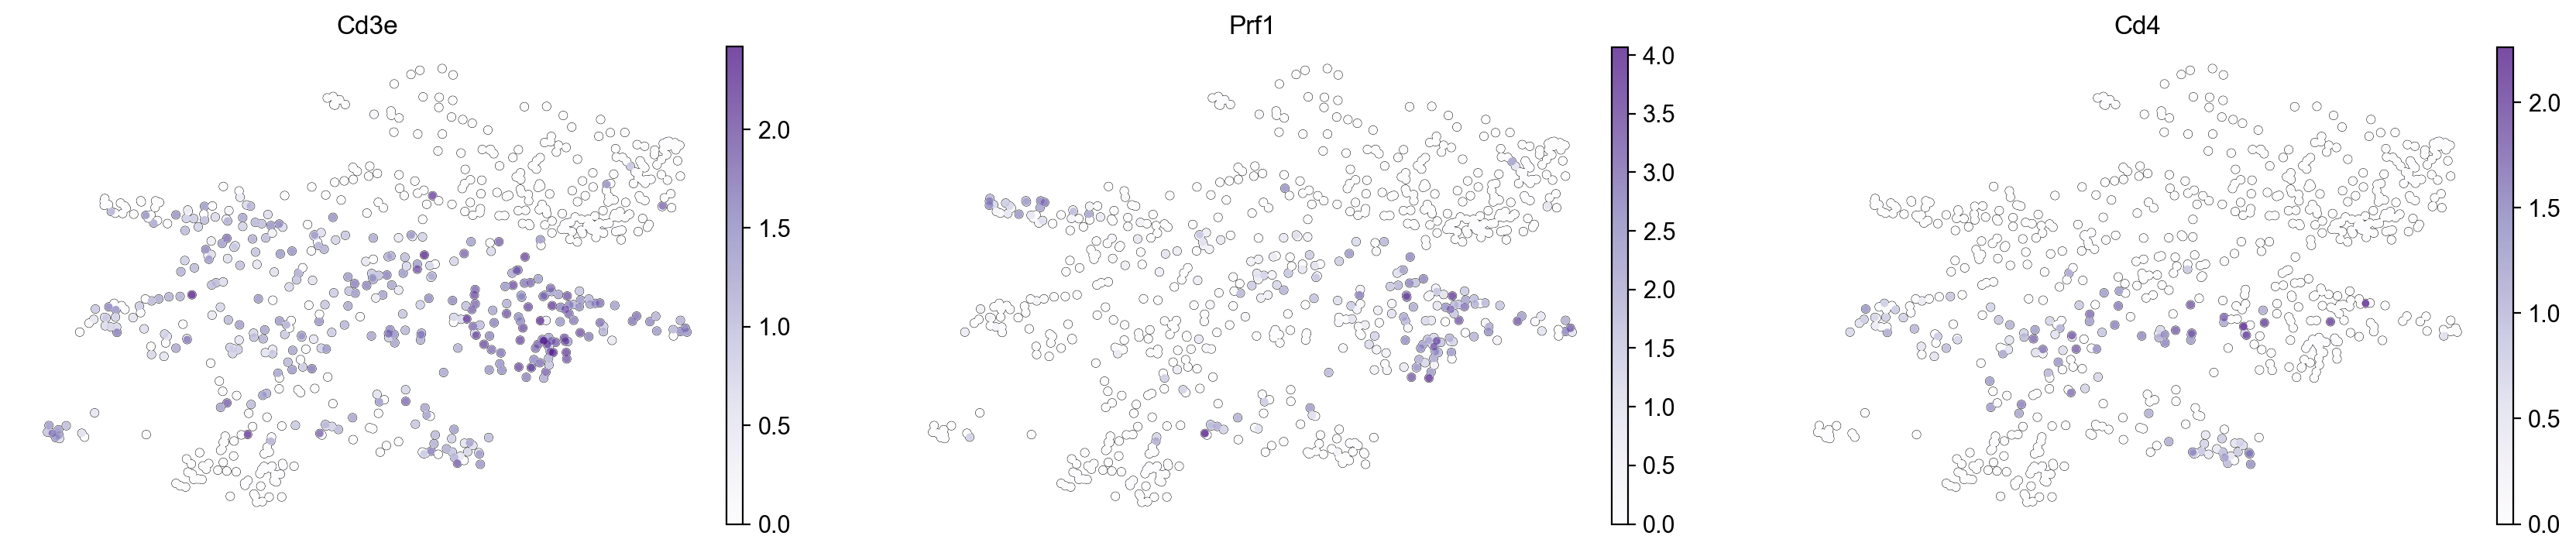

In [92]:
sc.pl.umap(adata, color=['Cd3e','Prf1', 'Cd4'],legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05), size=50,cmap='Purples',)

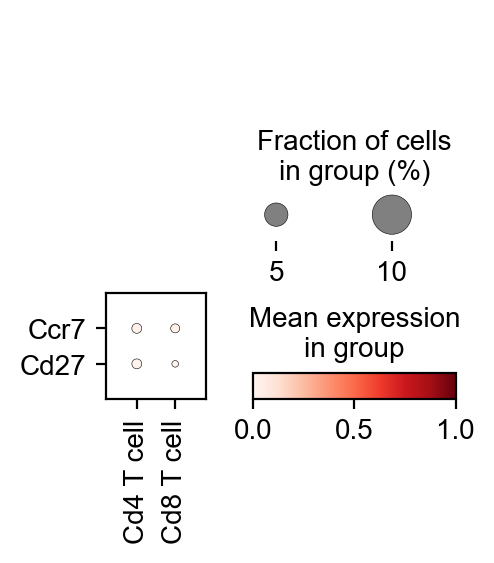

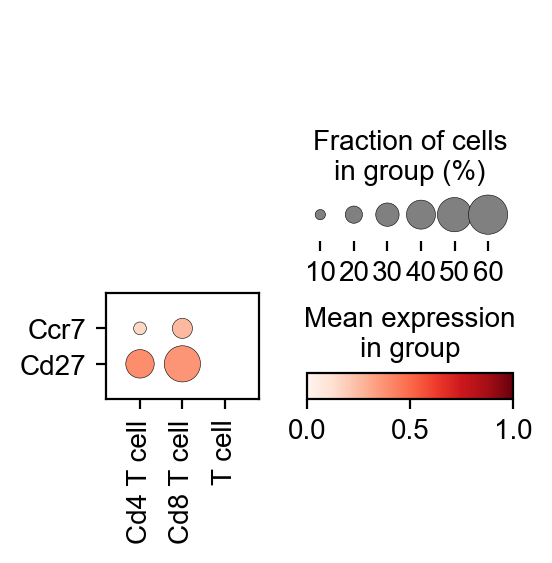

In [93]:
sc.pl.dotplot(adata[adata.obs['type']=='EKP'], ['Ccr7', #'Cd62',
    'Cd27',#'Cd95'
], groupby='celltype', vmin=0,vmax=1, swap_axes=True)
sc.pl.dotplot(adata[adata.obs['type']=='RKP'], ['Ccr7',#'Cd62',
    'Cd27',#'Cd95'
], groupby='celltype', vmin=0,vmax=1, swap_axes=True)

In [94]:
#adata.raw = adata

In [95]:
adata.raw.X

<699x16462 sparse matrix of type '<class 'numpy.float32'>'
	with 1369951 stored elements in Compressed Sparse Row format>

In [96]:
#sc.tl.pca(adata)
#sc.pp.neighbors(adata)

In [97]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
#sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata)
sc.tl.umap(adata)

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


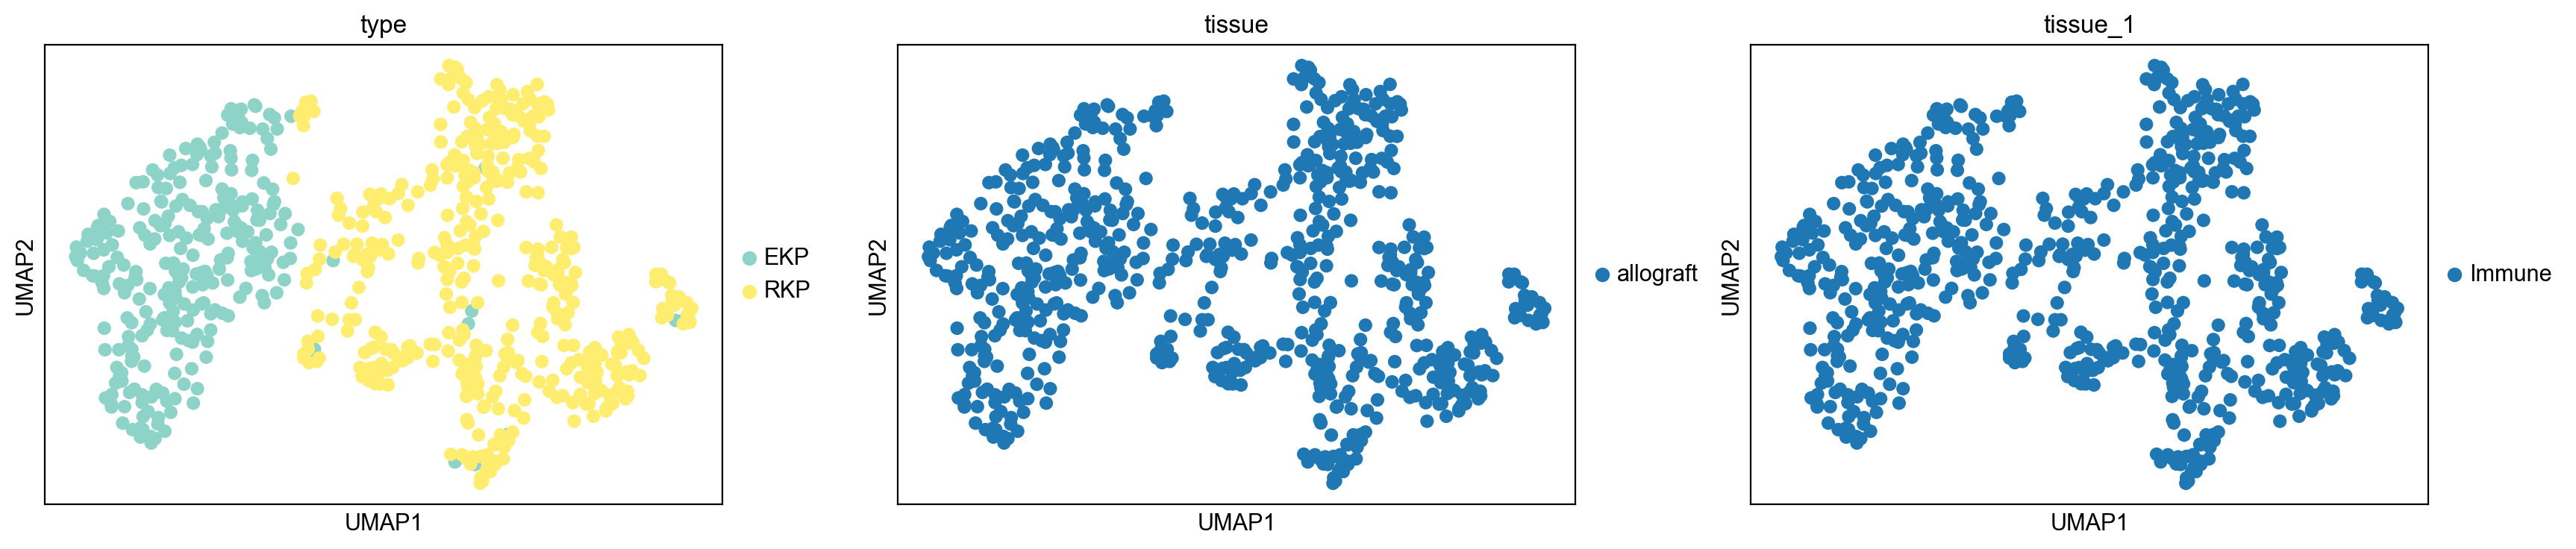

In [98]:
sc.pl.umap(adata, color=['type','tissue','tissue_1'])

In [99]:
adata_1 = adata

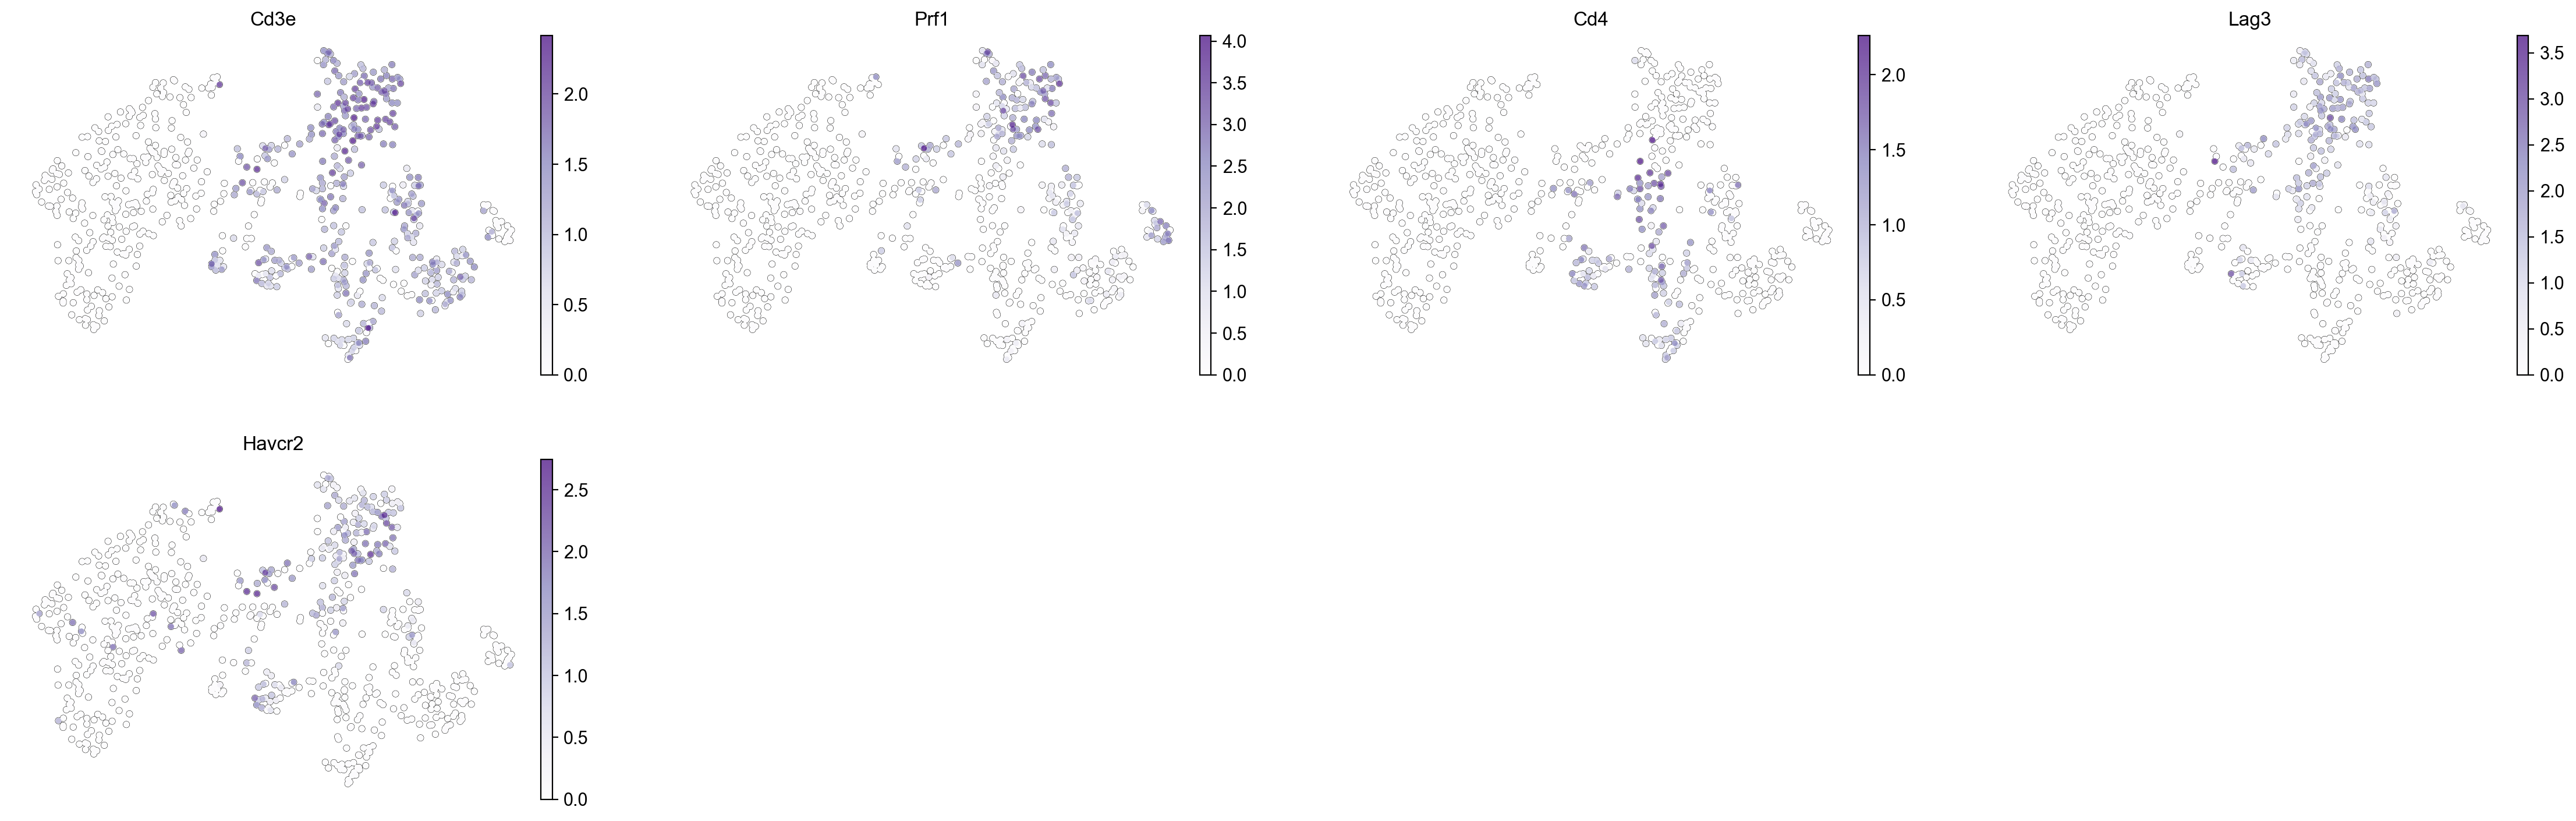

In [102]:
sc.pl.umap(adata_1, color=['Cd3e','Prf1', 'Cd4','Lag3','Havcr2'],legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05), size=50,cmap='Purples',)

In [103]:
#############################################################
############ Harmony batch correction #######################
#############################################################

sce.pp.harmony_integrate(adata, 'batch')
'X_pca_harmony' in adata.obsm
True

2024-04-29 16:18:35,310 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-29 16:18:35,454 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-29 16:18:35,456 - harmonypy - INFO - Iteration 1 of 10
2024-04-29 16:18:35,533 - harmonypy - INFO - Iteration 2 of 10
2024-04-29 16:18:35,599 - harmonypy - INFO - Iteration 3 of 10
2024-04-29 16:18:35,642 - harmonypy - INFO - Iteration 4 of 10
2024-04-29 16:18:35,685 - harmonypy - INFO - Iteration 5 of 10
2024-04-29 16:18:35,712 - harmonypy - INFO - Iteration 6 of 10
2024-04-29 16:18:35,739 - harmonypy - INFO - Iteration 7 of 10
2024-04-29 16:18:35,782 - harmonypy - INFO - Iteration 8 of 10
2024-04-29 16:18:35,818 - harmonypy - INFO - Iteration 9 of 10
2024-04-29 16:18:35,844 - harmonypy - INFO - Converged after 9 iterations


True

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


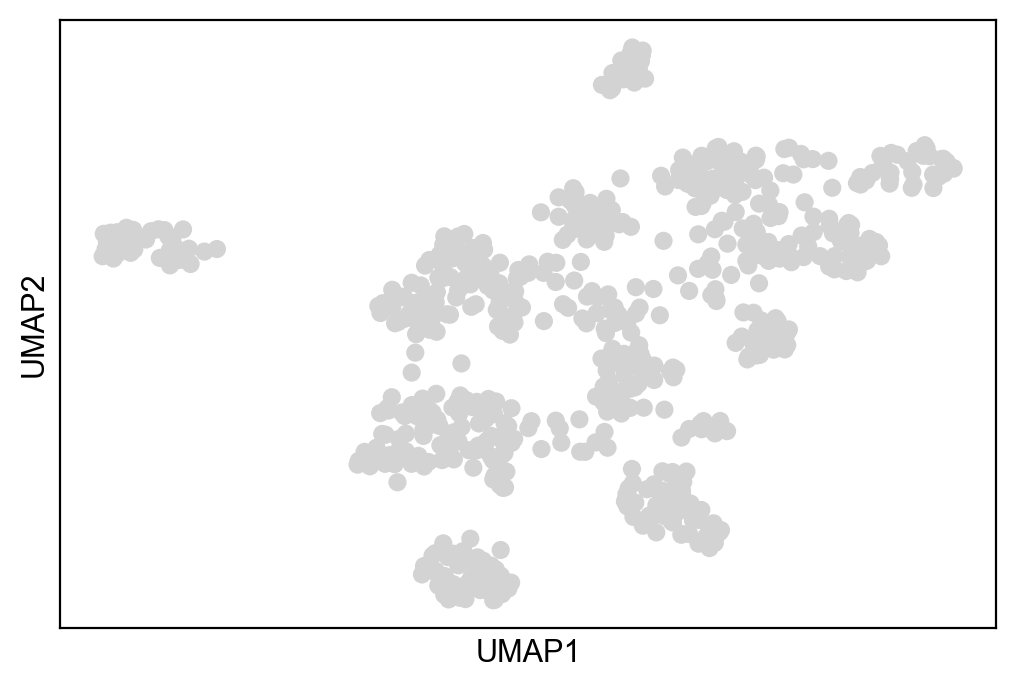

In [104]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.1)
sc.pl.umap(adata)

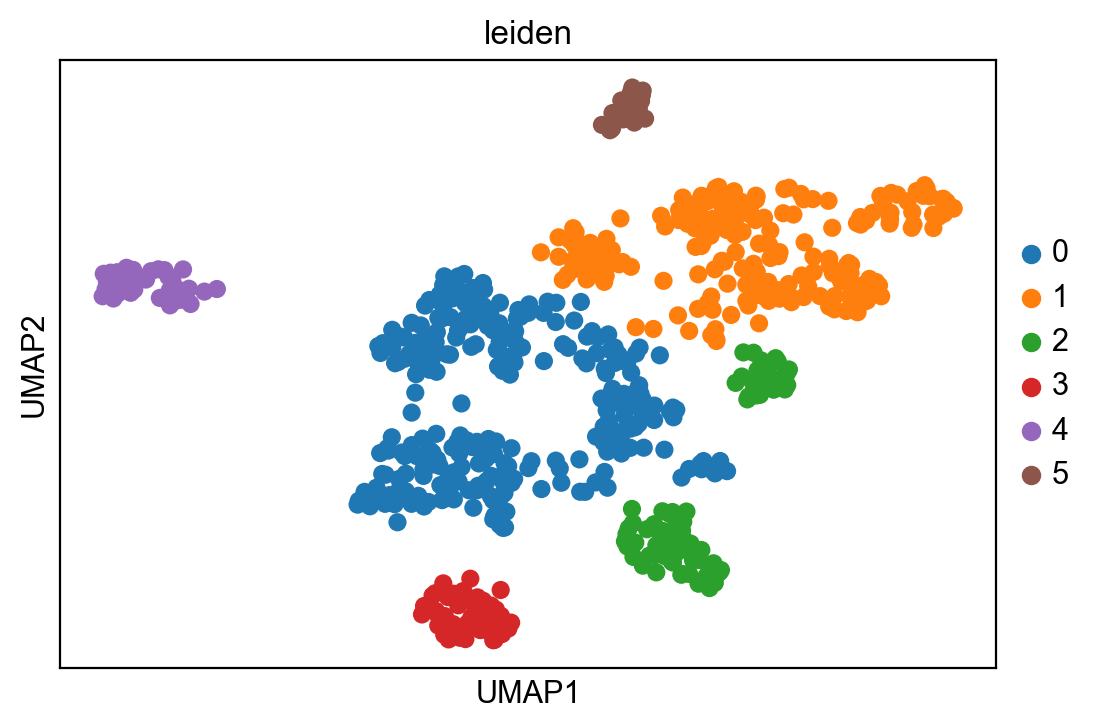

In [105]:
sc.pl.umap(adata, color=['leiden'])

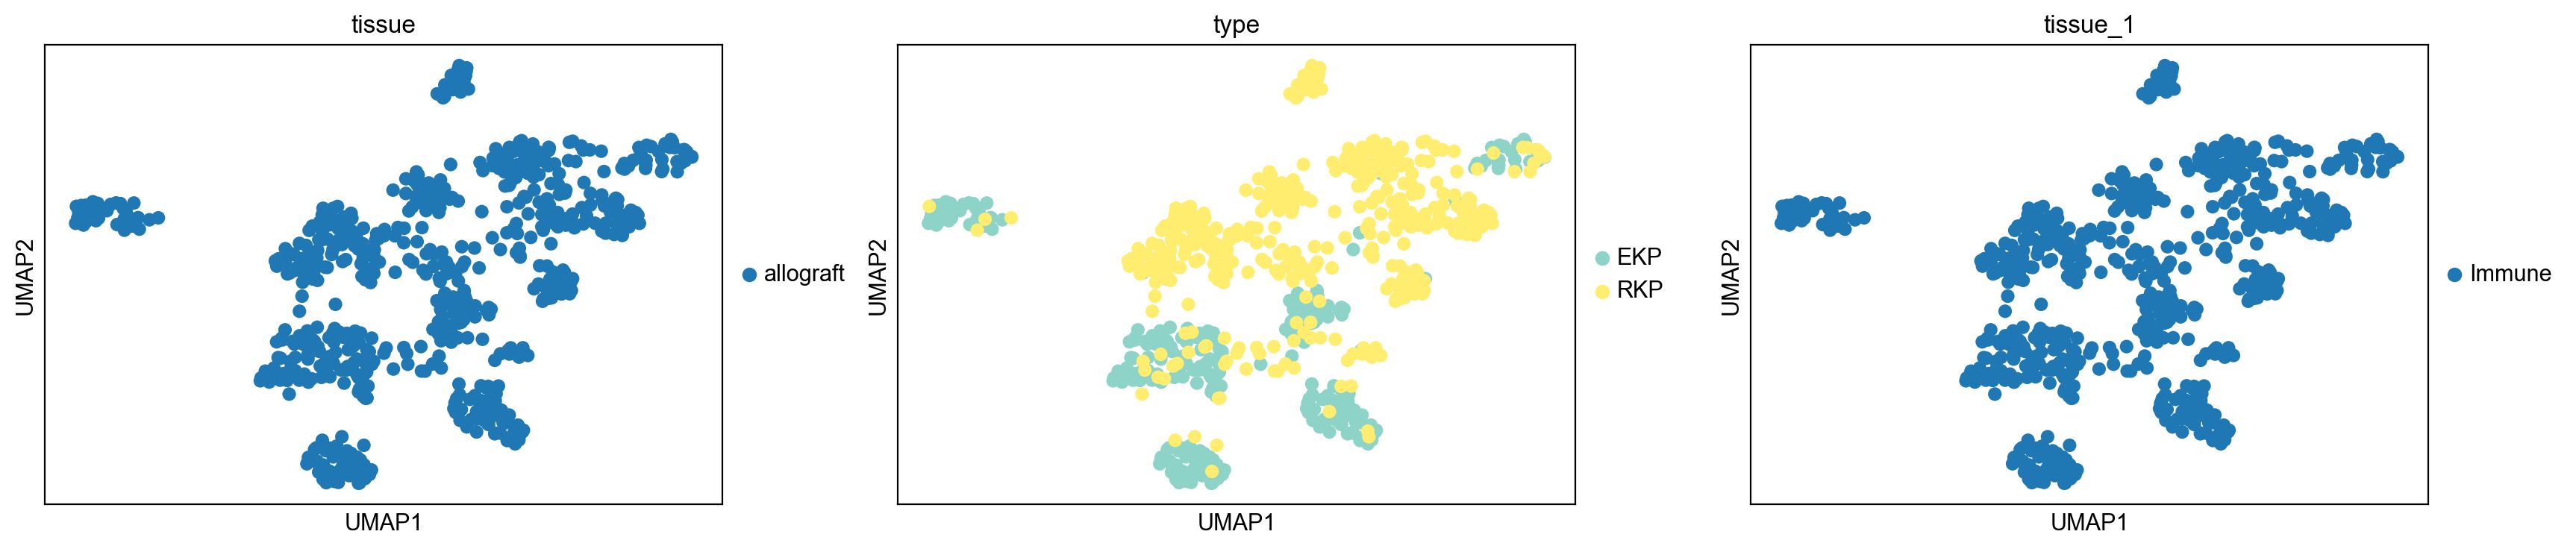

In [106]:
sc.pl.umap(adata, color=['tissue','type','tissue_1'])

In [107]:
df = pd.crosstab(adata.obs['tissue_1'], adata.obs['type'])
df

type      EKP  RKP
tissue_1          
Immune    278  421

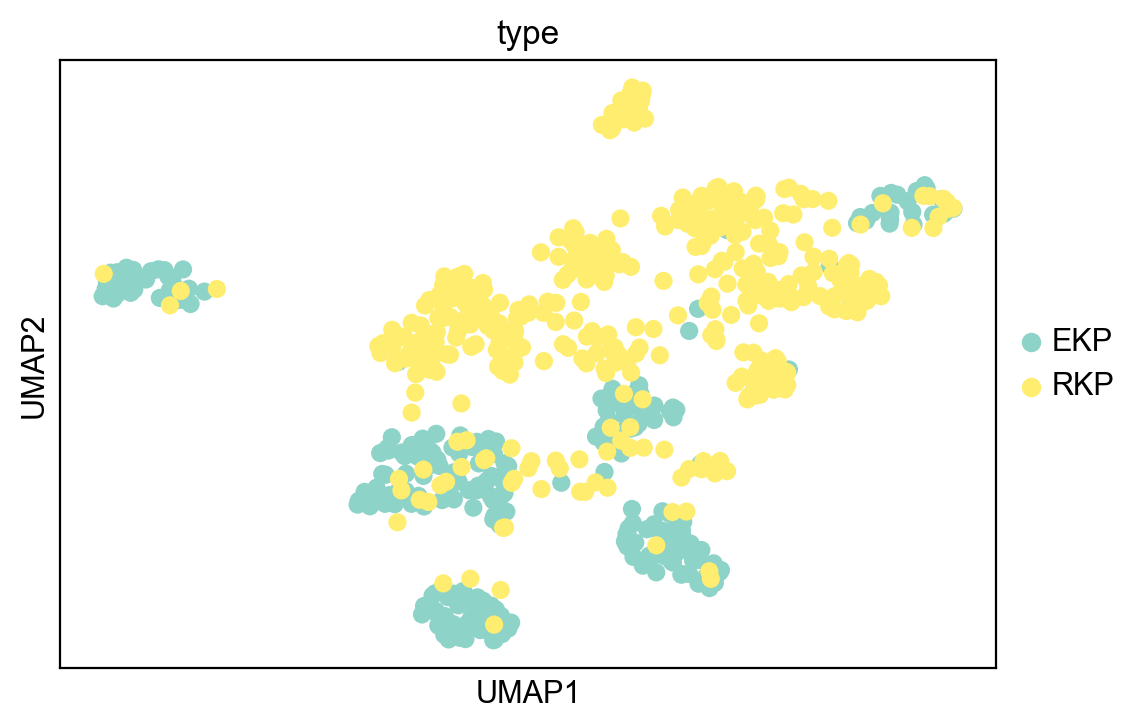

In [10]:
sc.pl.umap(adata, color=['type'],palette="Set3", save='_T_cell_by_type_modified.pdf')

In [69]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
AAACGCTCAGCTATAC-1-0     1108               1106   1432.900269   
AAAGAACCAACGTTAC-1-0      360                359    902.994568   
AAAGAACCAGATCACT-1-0      532                531   1164.364624   
AAAGAACGTTCTAACG-1-0      429                429   1036.792358   
AACAAGAGTATGAGCG-1-0     1016               1016   1562.875610   
...                       ...                ...           ...   
TTTATGCCAAGATGTA-1-1     2478               2466   2189.637451   
TTTCACAAGGGAGGTG-1-1     3981               3968   2180.291992   
TTTCACATCGTTCCTG-1-1     2290               2279   2299.202393   
TTTCCTCGTTAAGAAC-1-1     2045               2034   2233.270264   
TTTGTTGGTGAGTTTC-1-1     1946               1941   2026.742676   

                      total_counts_mt  pct_counts_mt     tissue type leiden  \
AAACGCTCAGCTATAC-1-0         0.767421       0.053557  allograft  EKP      0   
AAAGAACCAACGTTAC-1-0         5.155742       0.570960  allograft  EKP      2   
AAAGAACCAGATCACT-1-0        11.460076       0.984234  allograft  EKP      0   
AAAGAACGTTCTAACG-1-0        13.925270       1.343111  allograft  EKP      1   
AACAAGAGTATGAGCG-1-0         1.197922       0.076649  allograft  EKP      0   
...                               ...            ...        ...  ...    ...   
TTTATGCCAAGATGTA-1-1        31.620113       1.444080  allograft  RKP      0   
TTTCACAAGGGAGGTG-1-1        27.960487       1.282419  allograft  RKP      1   
TTTCACATCGTTCCTG-1-1        20.452291       0.889539  allograft  RKP      1   
TTTCCTCGTTAAGAAC-1-1        35.784237       1.602324  allograft  RKP      1   
TTTGTTGGTGAGTTTC-1-1        23.481369       1.158577  allograft  RKP      0   

                     batch tissue_1  total_counts_ribo  pct_counts_ribo  \
AAACGCTCAGCTATAC-1-0     0   Immune          49.807819         3.476014   
AAAGAACCAACGTTAC-1-0     0   Immune          23.860329         2.642356   
AAAGAACCAGATCACT-1-0     0   Immune          16.742529         1.437911   
AAAGAACGTTCTAACG-1-0     0   Immune          21.592438         2.082619   
AACAAGAGTATGAGCG-1-0     0   Immune          45.257126         2.895760   
...                    ...      ...                ...              ...   
TTTATGCCAAGATGTA-1-1     1   Immune         197.913742         9.038653   
TTTCACAAGGGAGGTG-1-1     1   Immune         250.257080        11.478146   
TTTCACATCGTTCCTG-1-1     1   Immune         189.494675         8.241757   
TTTCCTCGTTAAGAAC-1-1     1   Immune          22.240664         0.995879   
TTTGTTGGTGAGTTTC-1-1     1   Immune         114.538567         5.651362   

                      total_counts_hb  pct_counts_hb  percent_mt     n_counts  \
AAACGCTCAGCTATAC-1-0         0.000000       0.000000    0.000536  1432.900269   
AAAGAACCAACGTTAC-1-0         0.000000       0.000000    0.005710   902.994568   
AAAGAACCAGATCACT-1-0         1.967717       0.168995    0.009842  1164.364624   
AAAGAACGTTCTAACG-1-0         0.000000       0.000000    0.013431  1036.792358   
AACAAGAGTATGAGCG-1-0         0.000000       0.000000    0.000766  1562.875610   
...                               ...            ...         ...          ...   
TTTATGCCAAGATGTA-1-1         0.000000       0.000000    0.014441  2189.637451   
TTTCACAAGGGAGGTG-1-1         1.002966       0.046001    0.012824  2180.291992   
TTTCACATCGTTCCTG-1-1         1.387164       0.060332    0.008895  2299.202393   
TTTCCTCGTTAAGAAC-1-1         3.076353       0.137751    0.016023  2233.270264   
TTTGTTGGTGAGTTTC-1-1         0.717764       0.035415    0.011586  2026.742676   

                        celltype  
AAACGCTCAGCTATAC-1-0  Cd8 T cell  
AAAGAACCAACGTTAC-1-0  Cd8 T cell  
AAAGAACCAGATCACT-1-0  Cd4 T cell  
AAAGAACGTTCTAACG-1-0  Cd8 T cell  
AACAAGAGTATGAGCG-1-0  Cd4 T cell  
...                          ...  
TTTATGCCAAGATGTA-1-1  Cd4 T cell  
TTTCACAAGGGAGGTG-1-1  Cd8 T cell  
TTTCACATCGTTCCTG-1-1  Cd8 T cell  
TTTCCTCGTTAAGAAC-1-1  Cd8 T cell  
TTTGTTGGTGAGTTTC-1-1 

In [8]:
scv.set_figure_params(style='scvelo', dpi=100, dpi_save=300, frameon=None)

saving figure to file ./figures/scvelo__Tcell_scatterplot_by_type.pdf


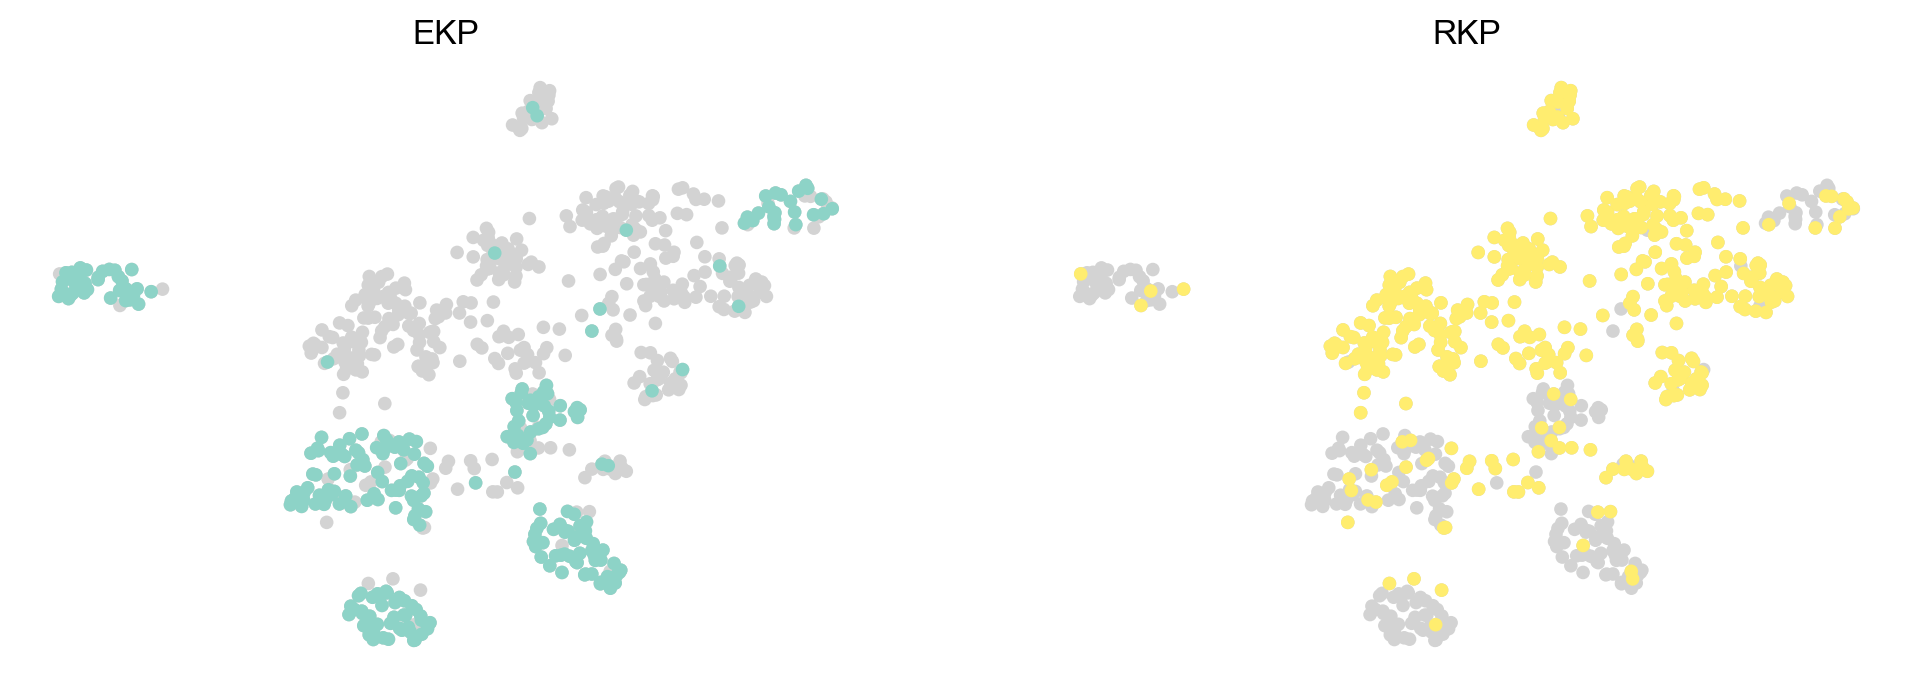

In [9]:
scv.pl.scatter(adata, groups=[[c] for c in adata.obs['type'].cat.categories], color='type', ncols=4, save="_Tcell_scatterplot_by_type.pdf")

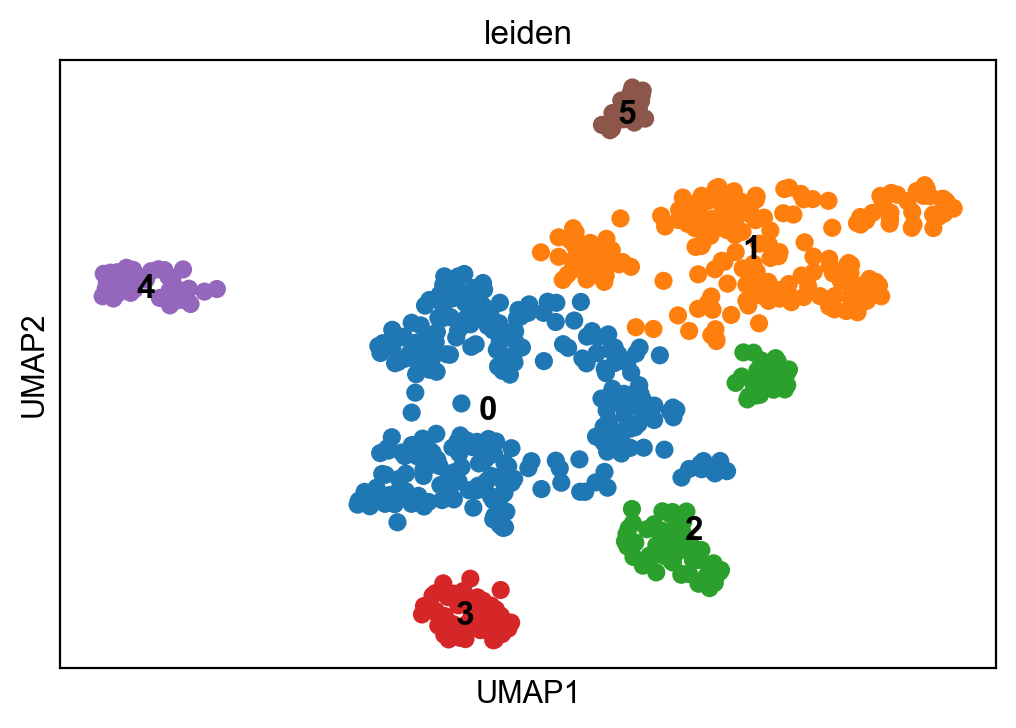

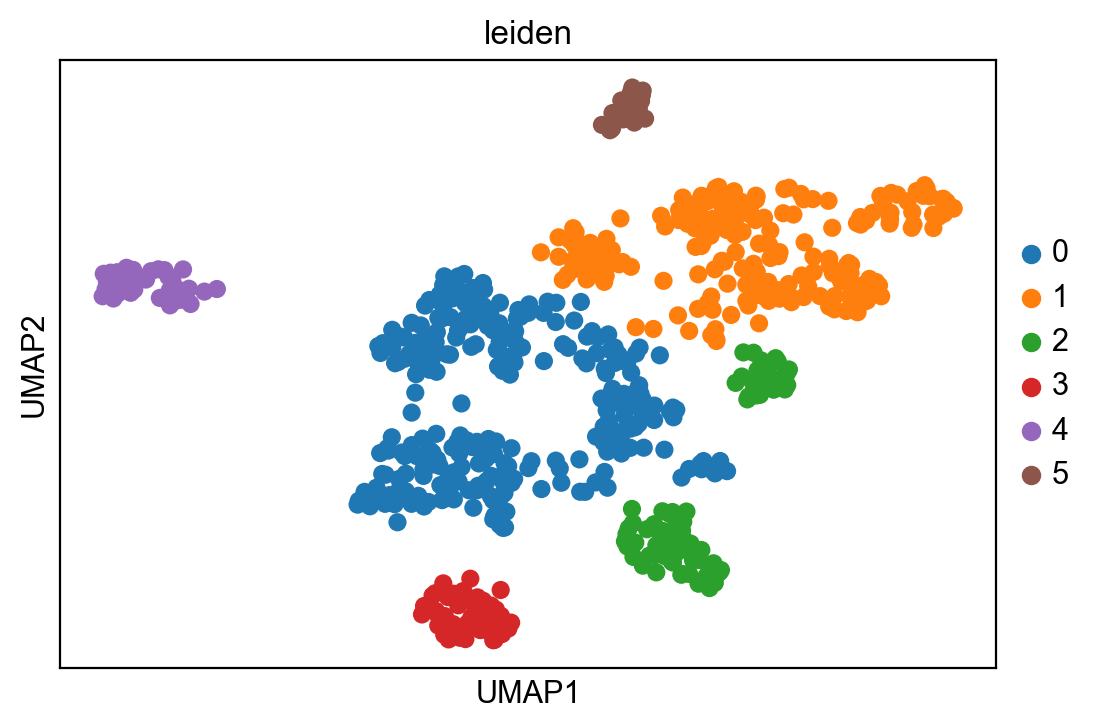

In [11]:
sc.pl.umap(adata, color=['leiden'],legend_loc='on data')#, save='_Immune_Normal8_NAC15_Tumor15_by_leiden.pdf')
sc.pl.umap(adata, color=['leiden'],legend_loc='right margin', save='_T_cell_by_leiden_1.pdf')

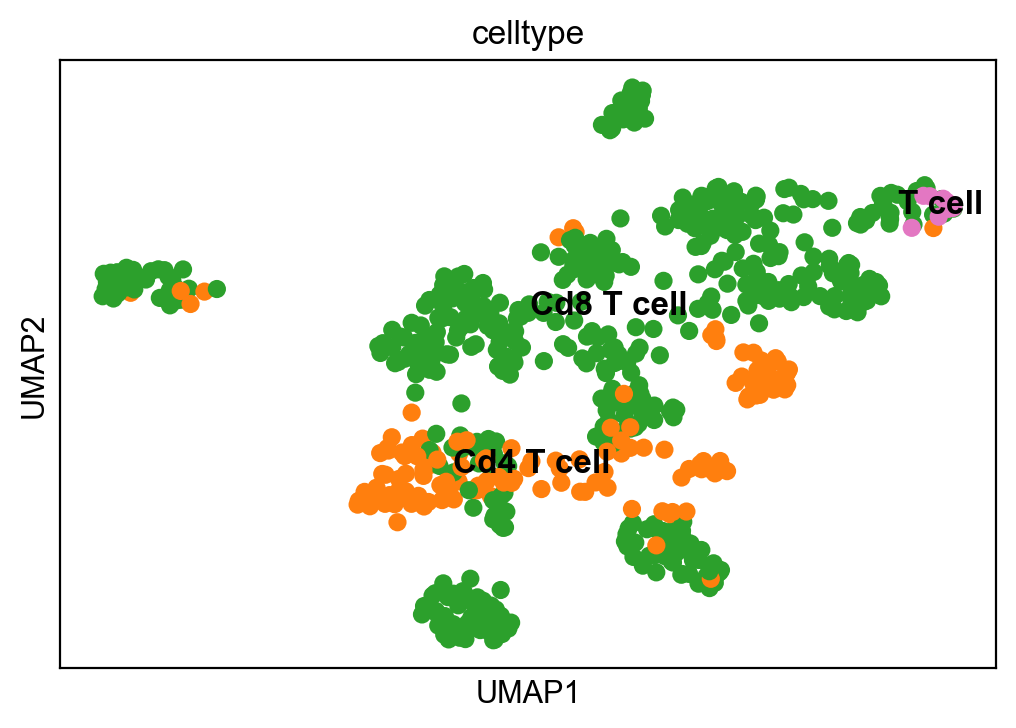

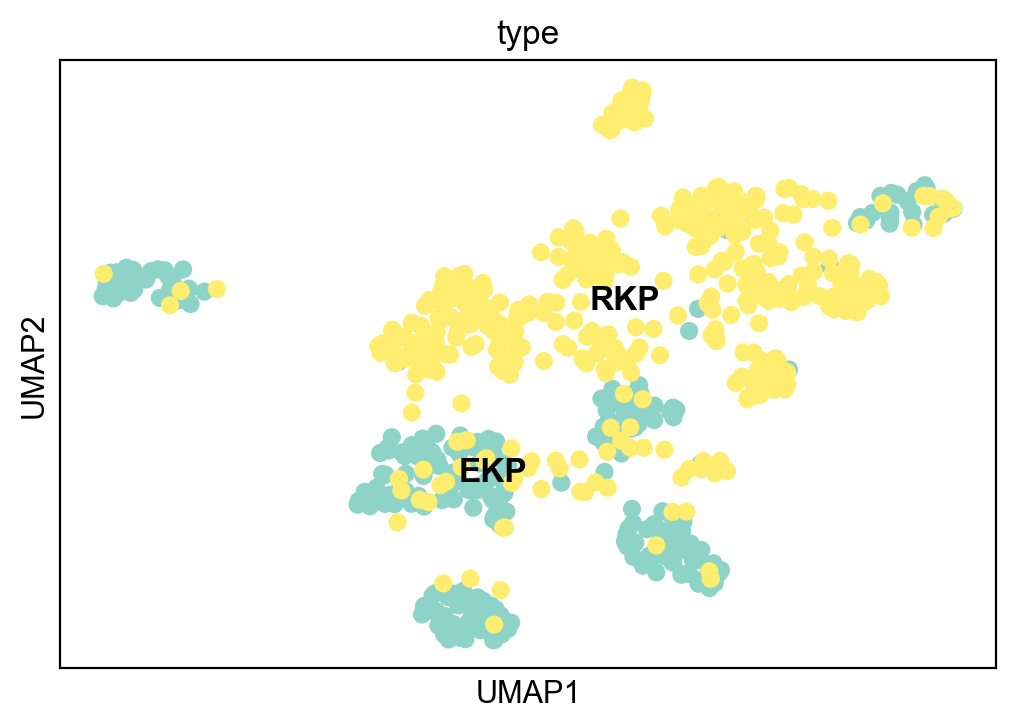

In [14]:
sc.pl.umap(adata, color=['celltype'],legend_loc='on data')#, save='_Immune_Normal8_NAC15_Tumor15_by_leiden.pdf')
sc.pl.umap(adata, color=['type'],legend_loc='on data')#, save='_Immune_Normal8_NAC15_Tumor15_by_leiden.pdf')

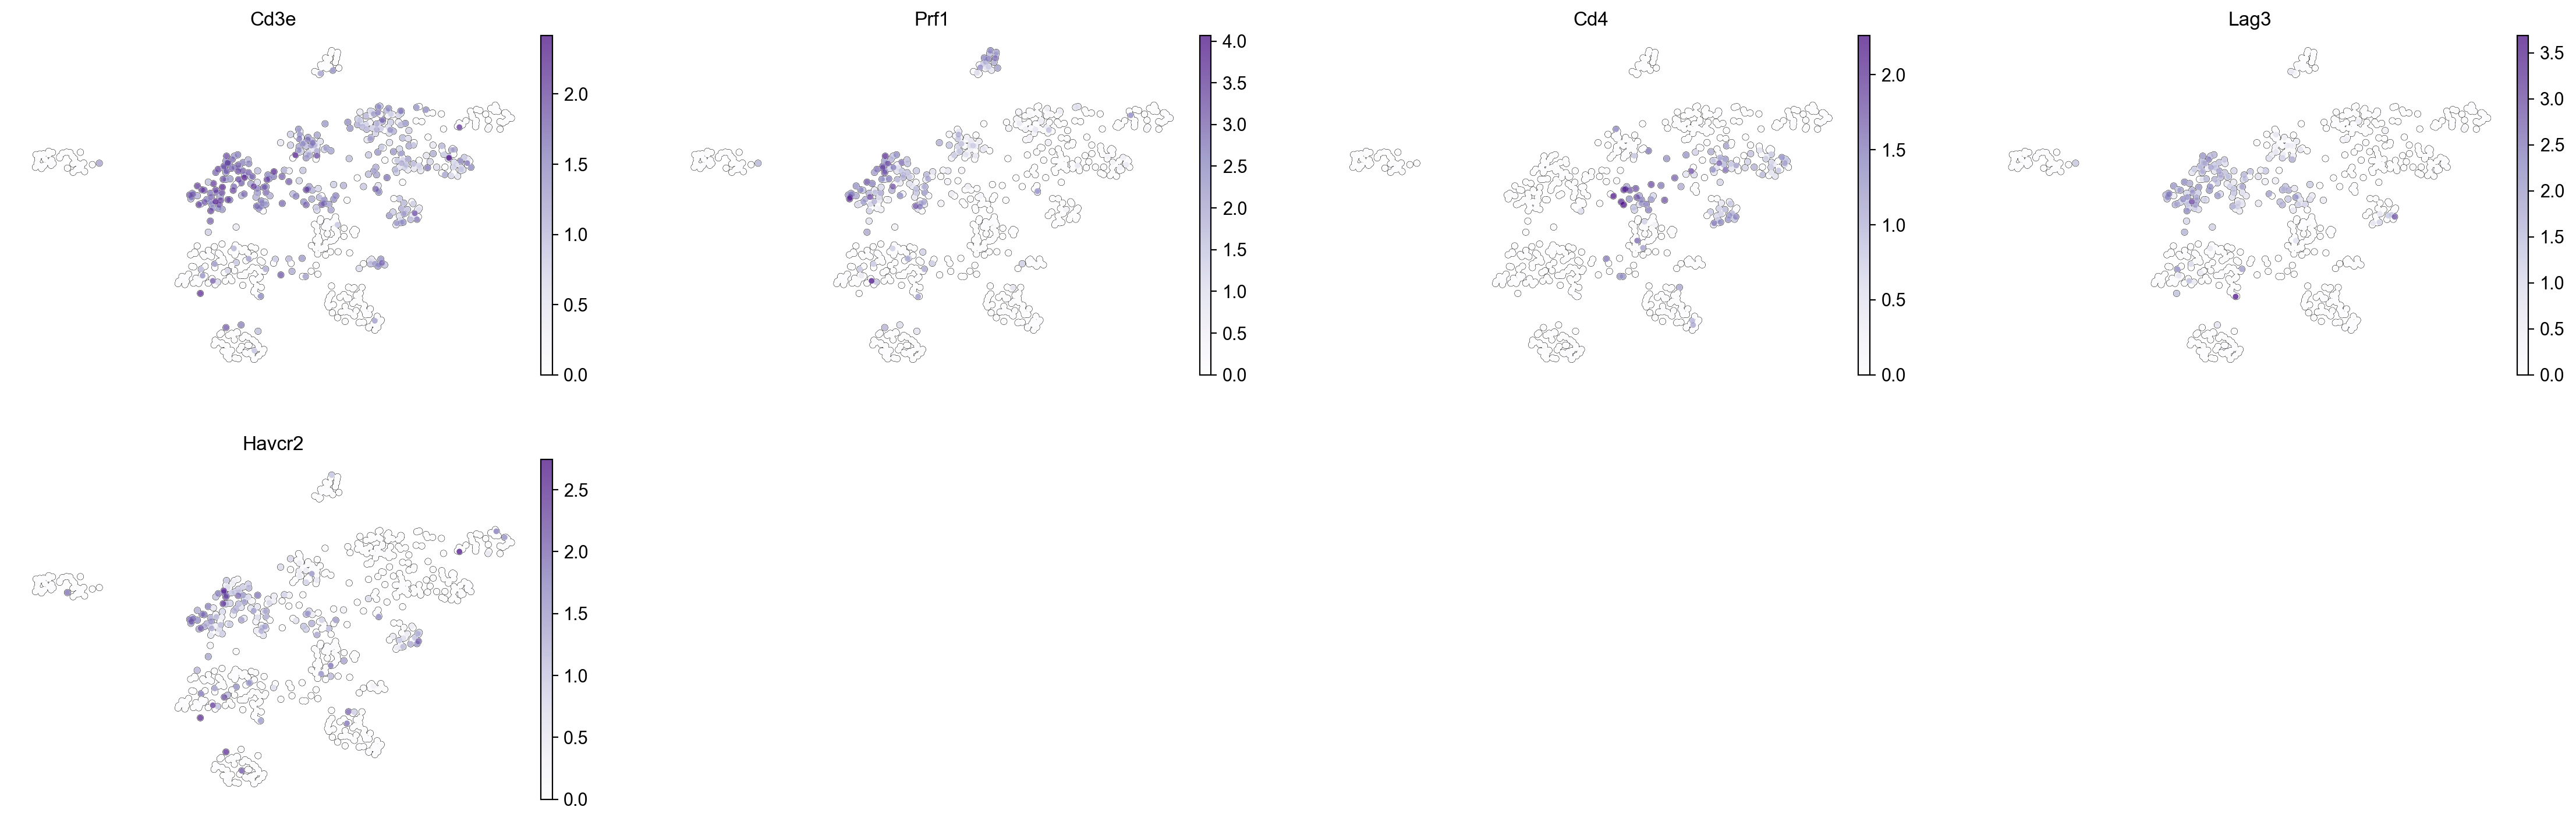

In [112]:
sc.pl.umap(adata, color=['Cd3e','Prf1', 'Cd4','Lag3','Havcr2'],legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05), size=50,cmap='Purples',)

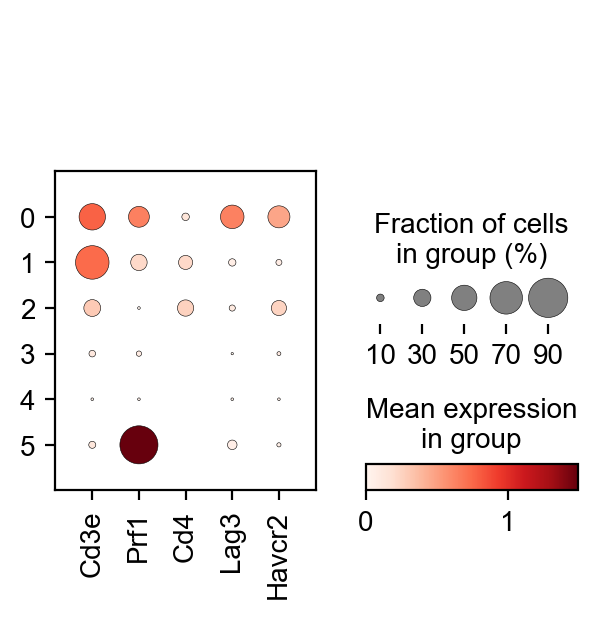

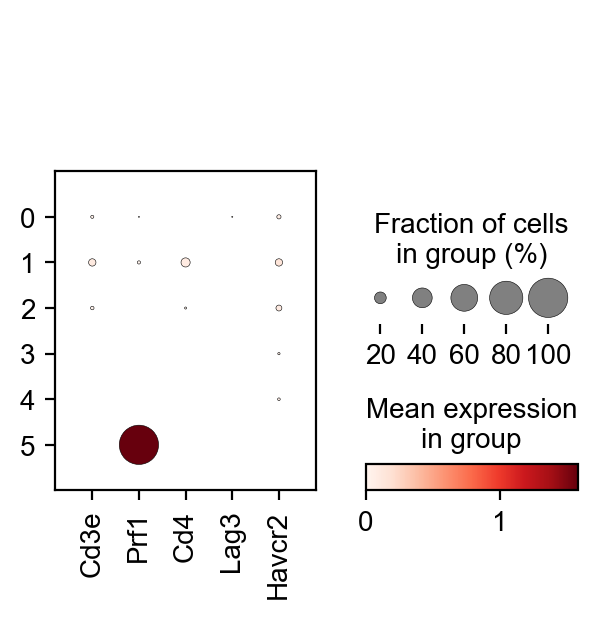

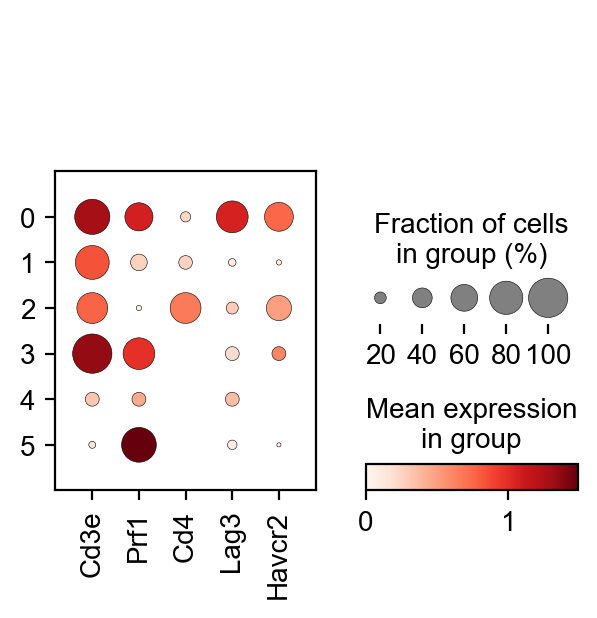

In [120]:
sc.pl.dotplot(adata, ['Cd3e','Prf1', 'Cd4','Lag3','Havcr2'], groupby='leiden')
sc.pl.dotplot(adata[adata.obs['type']=='EKP'], ['Cd3e','Prf1', 'Cd4','Lag3','Havcr2'], groupby='leiden')
sc.pl.dotplot(adata[adata.obs['type']=='RKP'], ['Cd3e','Prf1', 'Cd4','Lag3','Havcr2'], groupby='leiden')

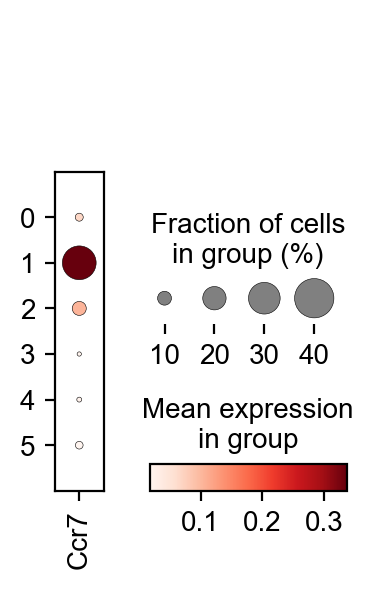

In [122]:
sc.pl.dotplot(adata, ['Ccr7'], groupby='leiden')

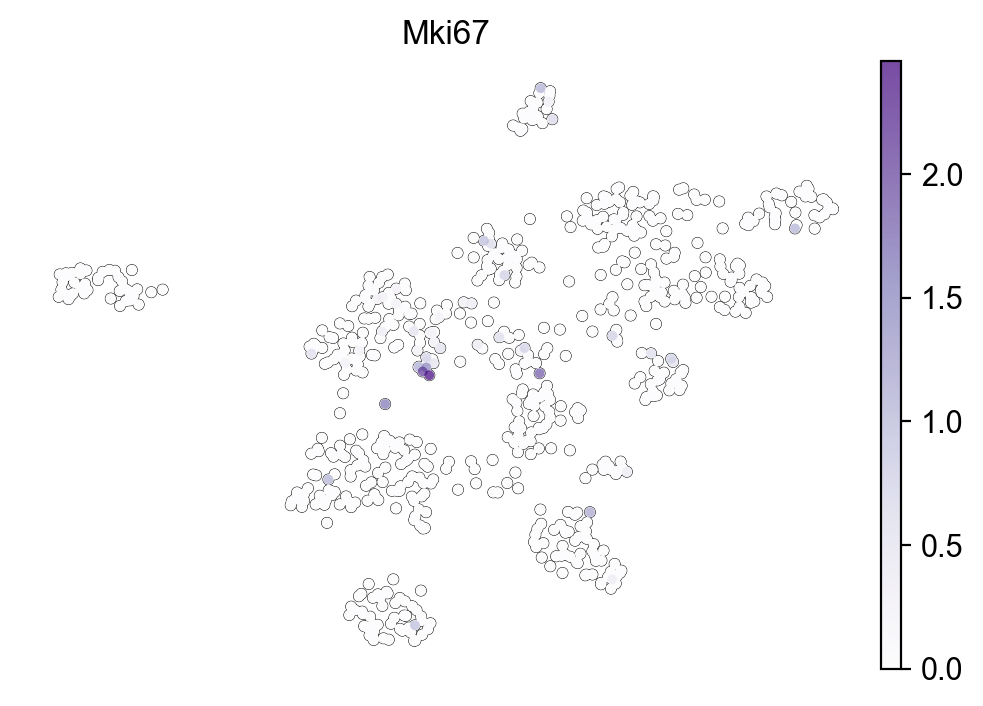

In [117]:
sc.pl.umap(adata, color=['Mki67'],legend_loc='right margin', frameon=False, add_outline=True, outline_width=(0.05,0.05), size=50,cmap='Purples',)

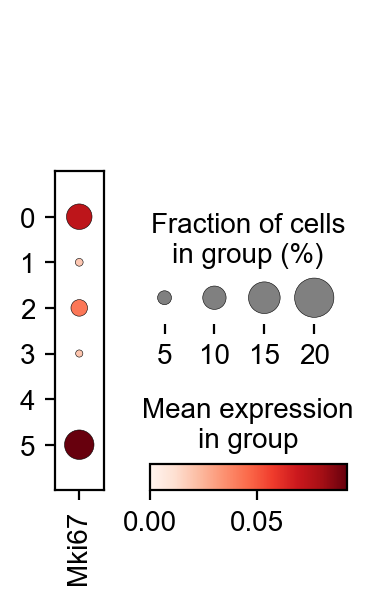

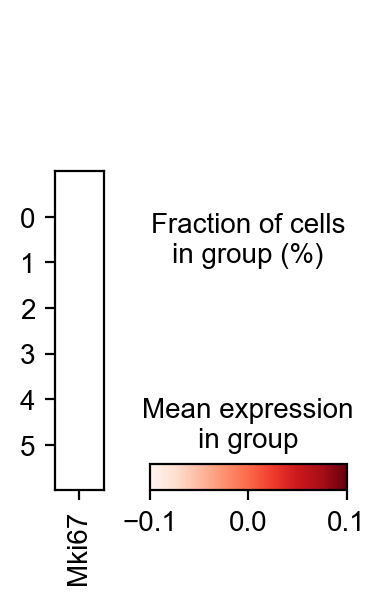

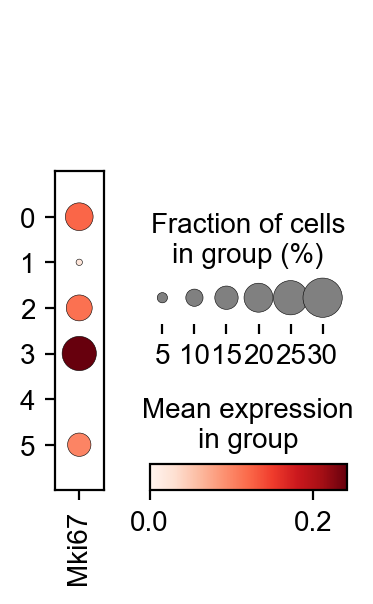

In [119]:
sc.pl.dotplot(adata, ['Mki67'], groupby='leiden')
sc.pl.dotplot(adata[adata.obs['type']=='EKP'], ['Mki67'], groupby='leiden')
sc.pl.dotplot(adata[adata.obs['type']=='RKP'], ['Mki67'], groupby='leiden')

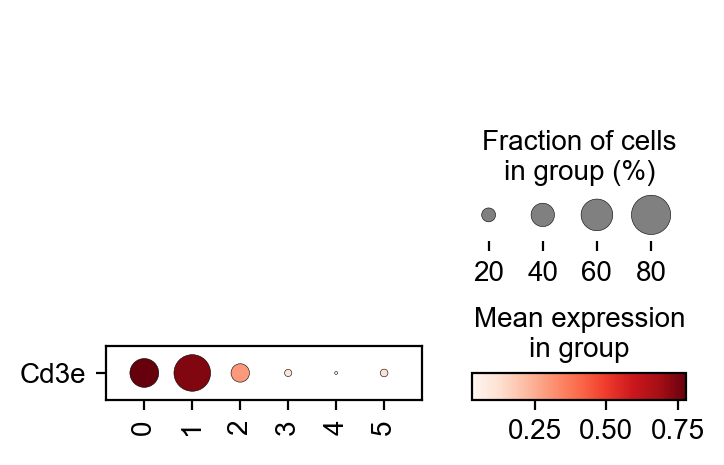

In [125]:
Tcell_geneset = [#'CD3D','CD3G',
    'Cd3e'#,'GZMK'
                ] # T cell
sc.pl.dotplot(adata, Tcell_geneset , 'leiden', swap_axes=True)
#T cell '4','7','10'

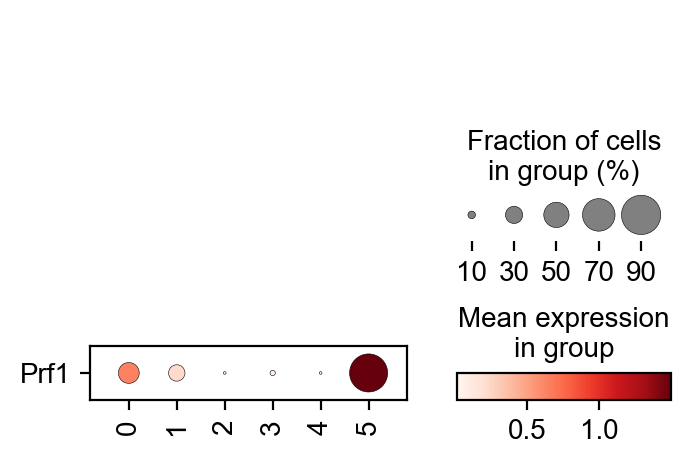

In [126]:
Teffcell_geneset = ['Prf1',
    #'GZMB'
                   ] # effector T cell
sc.pl.dotplot(adata, Teffcell_geneset , 'leiden',swap_axes=True)
#T effector cell '4'

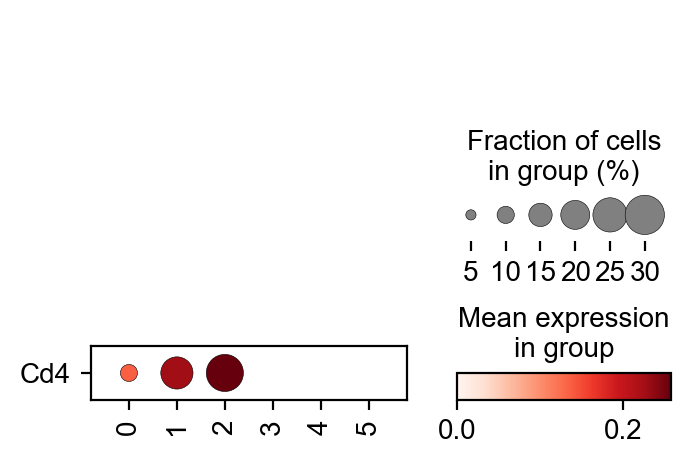

In [127]:
Cd4Tcell_geneset = ['Cd4'] # Cd4 T cell
sc.pl.dotplot(adata, Cd4Tcell_geneset , 'leiden',  swap_axes=True)
#Cd4 T cell '7'

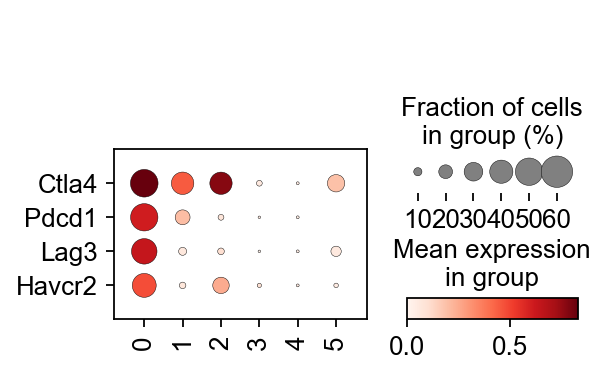

In [7]:
Texcell_geneset = ['Ctla4','Pdcd1',
    'Lag3','Havcr2'] # exhausted T cell
sc.pl.dotplot(adata, Texcell_geneset , 'leiden',  swap_axes=True)
#T exhausted cell '4','7' look reasonable

In [130]:
df = pd.crosstab(adata.obs['leiden'], adata.obs['type'])
df

type    EKP  RKP
leiden          
0       118  175
1        28  189
2        50   29
3        44    4
4        36    4
5         2   20

In [129]:
adata.write('Tcell_isolated_04-30-24.h5ad', compression='gzip')

In [54]:
adata= sc.read('Tcell_isolated_04-30-24.h5ad')
adata

AnnData object with n_obs × n_vars = 699 × 16462
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'tissue_1', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'celltype'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'celltype_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_rank_fgsea', 'neighbors', 'pca', 'tissue_1_colors', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
AAACGCTCAGCTATAC-1-0     1108               1106   1432.900269   
AAAGAACCAACGTTAC-1-0      360                359    902.994568   
AAAGAACCAGATCACT-1-0      532                531   1164.364624   
AAAGAACGTTCTAACG-1-0      429                429   1036.792358   
AACAAGAGTATGAGCG-1-0     1016               1016   1562.875610   
...                       ...                ...           ...   
TTTATGCCAAGATGTA-1-1     2478               2466   2189.637451   
TTTCACAAGGGAGGTG-1-1     3981               3968   2180.291992   
TTTCACATCGTTCCTG-1-1     2290               2279   2299.202393   
TTTCCTCGTTAAGAAC-1-1     2045               2034   2233.270264   
TTTGTTGGTGAGTTTC-1-1     1946               1941   2026.742676   

                      total_counts_mt  pct_counts_mt     tissue type leiden  \
AAACGCTCAGCTATAC-1-0         0.767421       0.053557  allograft  EKP      0   
AAAGAACCAACGTTAC-1-0         5.155742       0.570960  allograft  EKP      2   
AAAGAACCAGATCACT-1-0        11.460076       0.984234  allograft  EKP      0   
AAAGAACGTTCTAACG-1-0        13.925270       1.343111  allograft  EKP      1   
AACAAGAGTATGAGCG-1-0         1.197922       0.076649  allograft  EKP      0   
...                               ...            ...        ...  ...    ...   
TTTATGCCAAGATGTA-1-1        31.620113       1.444080  allograft  RKP      0   
TTTCACAAGGGAGGTG-1-1        27.960487       1.282419  allograft  RKP      1   
TTTCACATCGTTCCTG-1-1        20.452291       0.889539  allograft  RKP      1   
TTTCCTCGTTAAGAAC-1-1        35.784237       1.602324  allograft  RKP      1   
TTTGTTGGTGAGTTTC-1-1        23.481369       1.158577  allograft  RKP      0   

                     batch tissue_1  total_counts_ribo  pct_counts_ribo  \
AAACGCTCAGCTATAC-1-0     0   Immune          49.807819         3.476014   
AAAGAACCAACGTTAC-1-0     0   Immune          23.860329         2.642356   
AAAGAACCAGATCACT-1-0     0   Immune          16.742529         1.437911   
AAAGAACGTTCTAACG-1-0     0   Immune          21.592438         2.082619   
AACAAGAGTATGAGCG-1-0     0   Immune          45.257126         2.895760   
...                    ...      ...                ...              ...   
TTTATGCCAAGATGTA-1-1     1   Immune         197.913742         9.038653   
TTTCACAAGGGAGGTG-1-1     1   Immune         250.257080        11.478146   
TTTCACATCGTTCCTG-1-1     1   Immune         189.494675         8.241757   
TTTCCTCGTTAAGAAC-1-1     1   Immune          22.240664         0.995879   
TTTGTTGGTGAGTTTC-1-1     1   Immune         114.538567         5.651362   

                      total_counts_hb  pct_counts_hb  percent_mt     n_counts  \
AAACGCTCAGCTATAC-1-0         0.000000       0.000000    0.000536  1432.900269   
AAAGAACCAACGTTAC-1-0         0.000000       0.000000    0.005710   902.994568   
AAAGAACCAGATCACT-1-0         1.967717       0.168995    0.009842  1164.364624   
AAAGAACGTTCTAACG-1-0         0.000000       0.000000    0.013431  1036.792358   
AACAAGAGTATGAGCG-1-0         0.000000       0.000000    0.000766  1562.875610   
...                               ...            ...         ...          ...   
TTTATGCCAAGATGTA-1-1         0.000000       0.000000    0.014441  2189.637451   
TTTCACAAGGGAGGTG-1-1         1.002966       0.046001    0.012824  2180.291992   
TTTCACATCGTTCCTG-1-1         1.387164       0.060332    0.008895  2299.202393   
TTTCCTCGTTAAGAAC-1-1         3.076353       0.137751    0.016023  2233.270264   
TTTGTTGGTGAGTTTC-1-1         0.717764       0.035415    0.011586  2026.742676   

                        celltype  
AAACGCTCAGCTATAC-1-0  Cd8 T cell  
AAAGAACCAACGTTAC-1-0  Cd8 T cell  
AAAGAACCAGATCACT-1-0  Cd4 T cell  
AAAGAACGTTCTAACG-1-0  Cd8 T cell  
AACAAGAGTATGAGCG-1-0  Cd4 T cell  
...                          ...  
TTTATGCCAAGATGTA-1-1  Cd4 T cell  
TTTCACAAGGGAGGTG-1-1  Cd8 T cell  
TTTCACATCGTTCCTG-1-1  Cd8 T cell  
TTTCCTCGTTAAGAAC-1-1  Cd8 T cell  
TTTGTTGGTGAGTTTC-1-1 

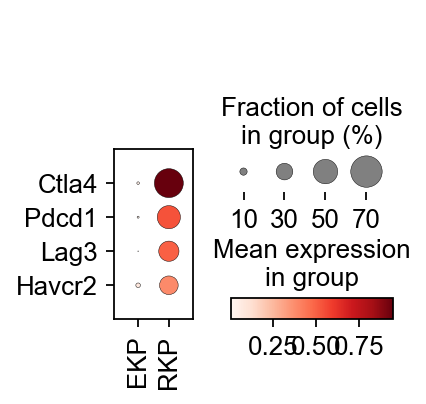

In [14]:
Texcell_geneset = ['Ctla4','Pdcd1',
    'Lag3','Havcr2'] # exhausted T cell
sc.pl.dotplot(adata, Texcell_geneset, groupby='type',  swap_axes=True, save='_T_cell_exT_markers_by_genotype.pdf')


In [15]:
sc.tl.rank_genes_groups(adata, 'type', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [16]:
result_T_ekprkp = adata.uns['rank_genes_groups']
groups_T_ekprkp = result_T_ekprkp['names'].dtype.names
pval_table_T_ekprkp = pd.DataFrame(
            {group + '_' + key[:2]: result_T_ekprkp[key][group]
            for group in groups_T_ekprkp for key in ['names', 'pvals_adj']})
pval_table_T_ekprkp

EKP_na         EKP_pv   RKP_na         RKP_pv
0        Basp1   7.760260e-89     Gphn  9.319232e-160
1      Pik3ap1   1.725391e-69    Cmss1  4.053235e-161
2        Cxcl2   1.325379e-66    Skap1  5.432670e-195
3        Neat1   3.564056e-69    Mbnl1  8.502786e-162
4        Ero1l   3.786177e-63   Tmsb10  1.900940e-159
...        ...            ...      ...            ...
16457   Tmsb10  1.900940e-159    Ero1l   3.786177e-63
16458    Mbnl1  8.502786e-162    Neat1   3.564056e-69
16459    Skap1  5.432670e-195    Cxcl2   1.325379e-66
16460    Cmss1  4.053235e-161  Pik3ap1   1.725391e-69
16461     Gphn  9.319232e-160    Basp1   7.760260e-89

[16462 rows x 4 columns]

In [17]:
pval_table_T_ekprkp.loc[pval_table_T_ekprkp['RKP_na'].isin(['Ctla4','Pdcd1','Lag3','Havcr2'])]

EKP_na        EKP_pv  RKP_na        RKP_pv
264     Cd33  1.050584e-09   Ctla4  2.612500e-55
437   Klhl24  5.508848e-06   Pdcd1  4.358217e-41
566    Rbpms  2.353531e-04    Lag3  4.535598e-34
1964  Inpp5j  4.000560e-01  Havcr2  2.569488e-14

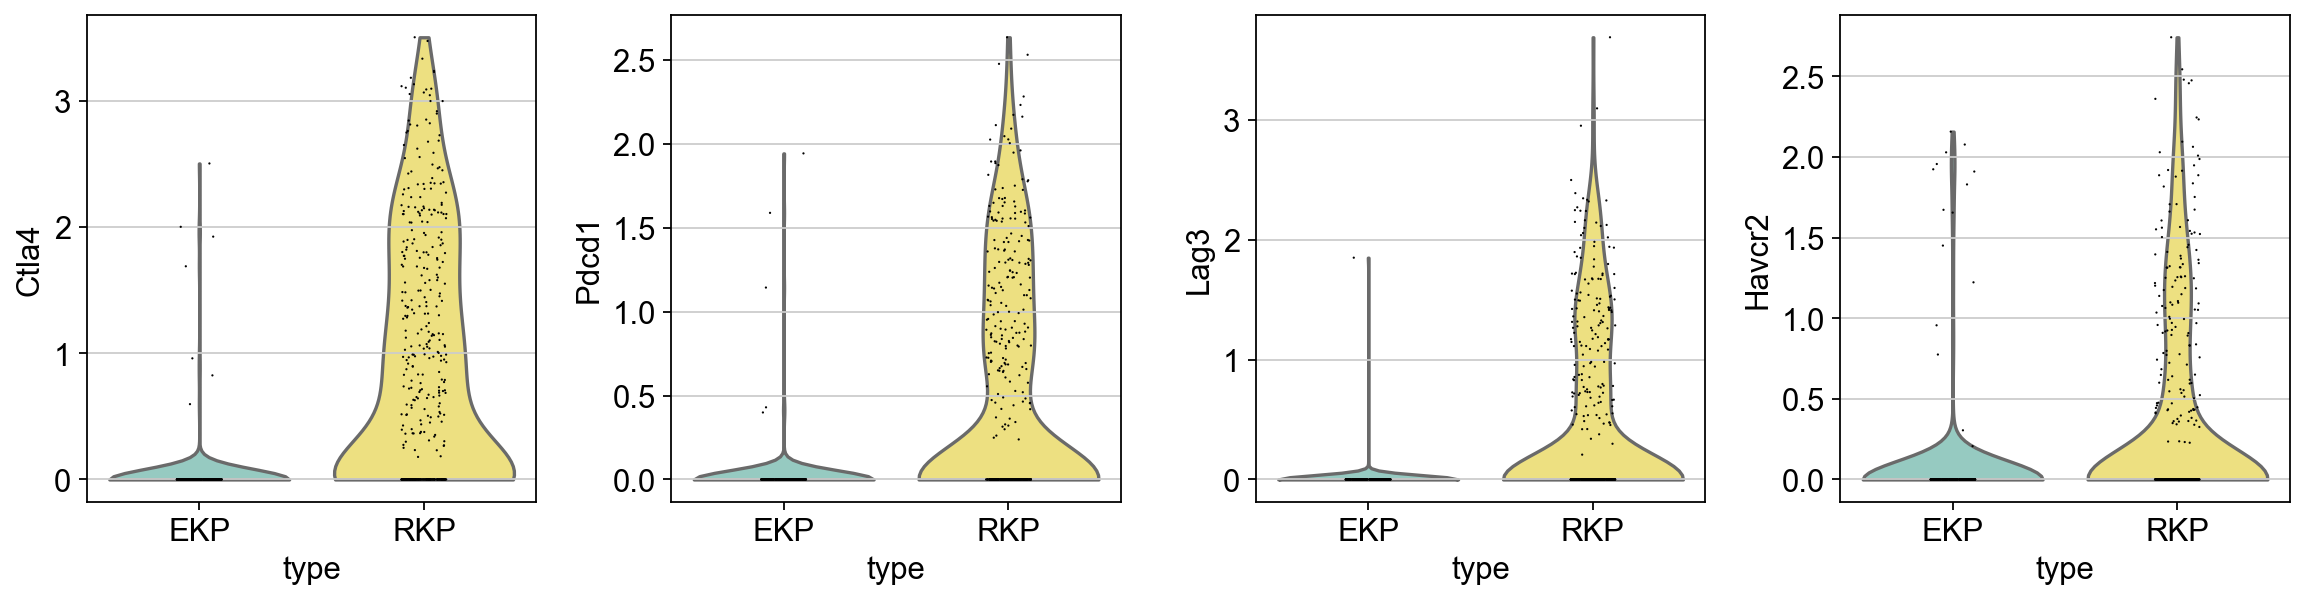

In [19]:
sc.pl.violin(adata, ['Ctla4','Pdcd1','Lag3','Havcr2'], groupby='type', swap_axes=False, save='_Tcell_Ctla4,Pdcd1,Lag3,Havcr2_by_genotype.pdf')

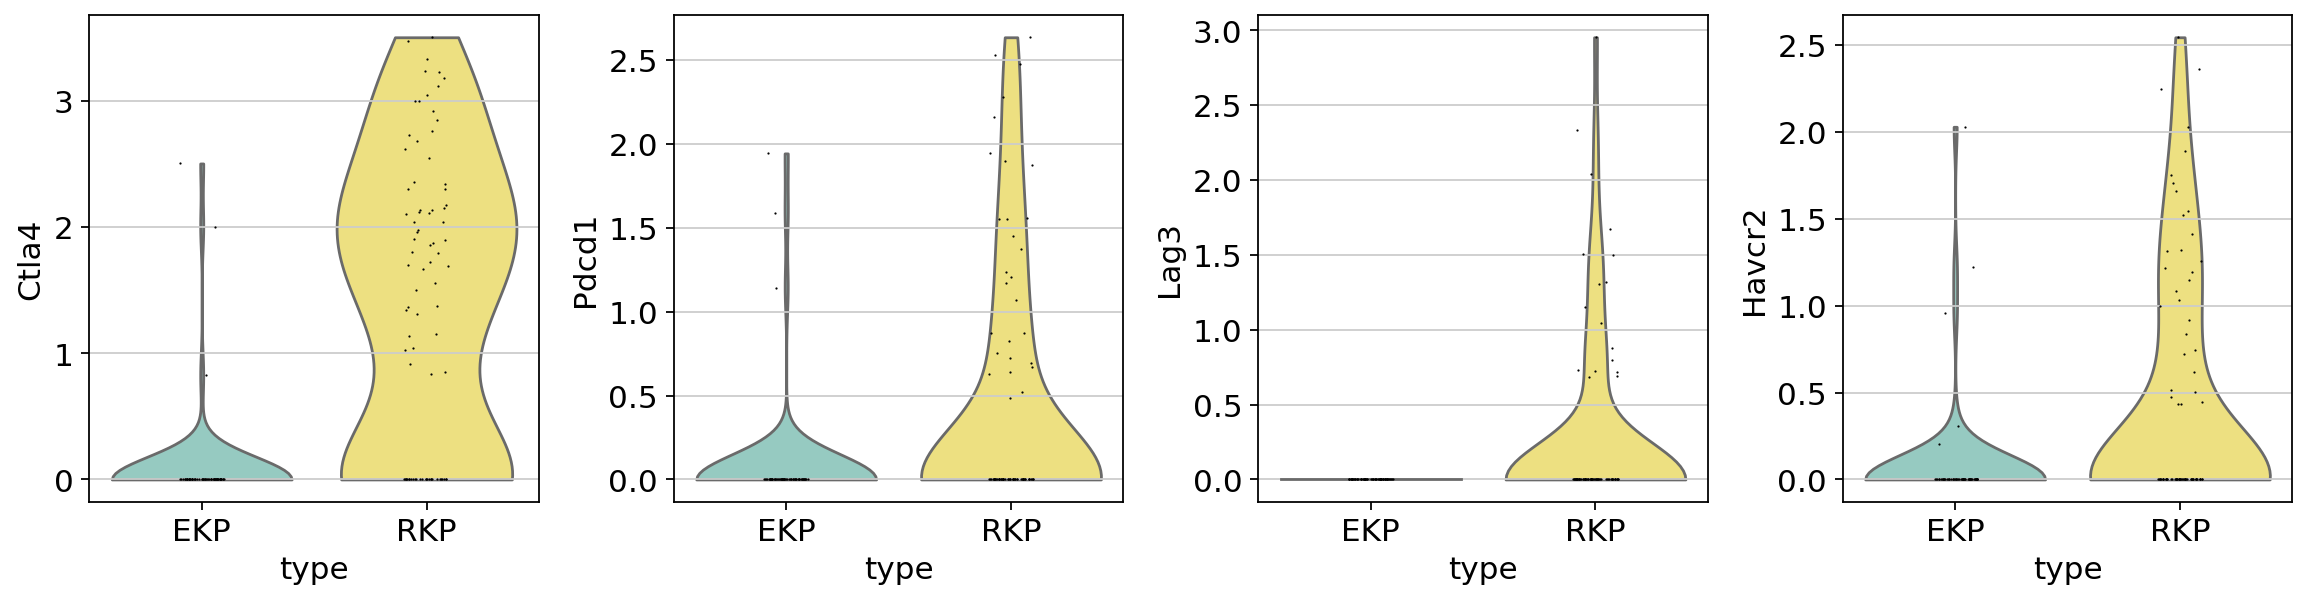

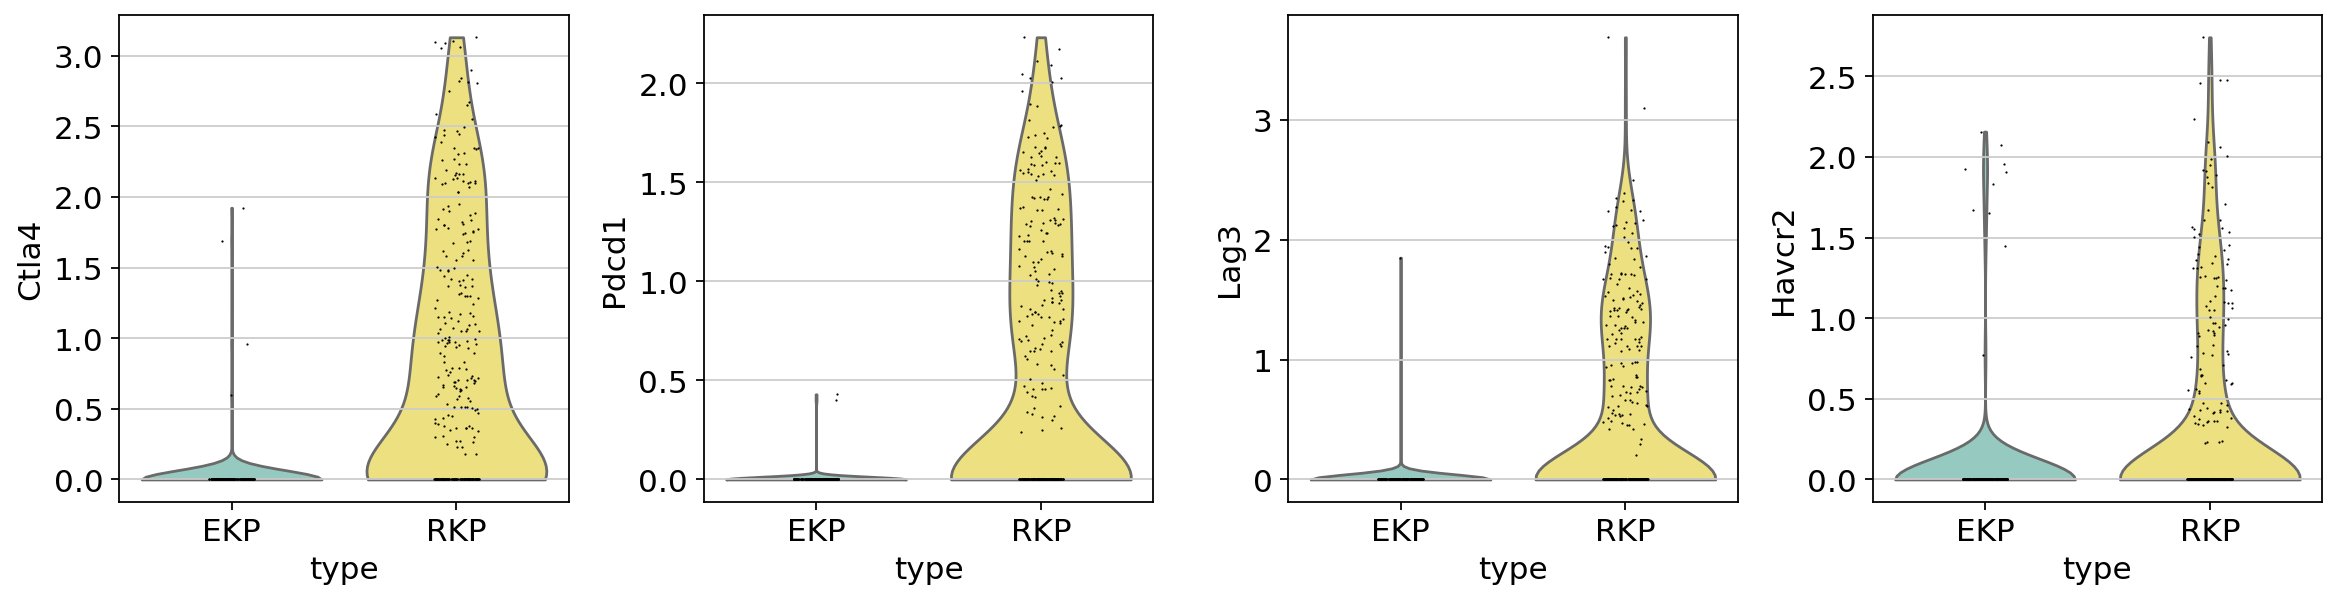

In [8]:
sc.pl.violin(adata[adata.obs['celltype']=='Cd4 T cell'], ['Ctla4','Pdcd1','Lag3','Havcr2'], groupby='type')#, save='_Tcell_Ctla4,Pdcd1,Lag3,Havcr2_by_genotype.pdf')
sc.pl.violin(adata[adata.obs['celltype']=='Cd8 T cell'], ['Ctla4','Pdcd1','Lag3','Havcr2'], groupby='type')#, save='_Tcell_Ctla4,Pdcd1,Lag3,Havcr2_by_genotype.pdf')

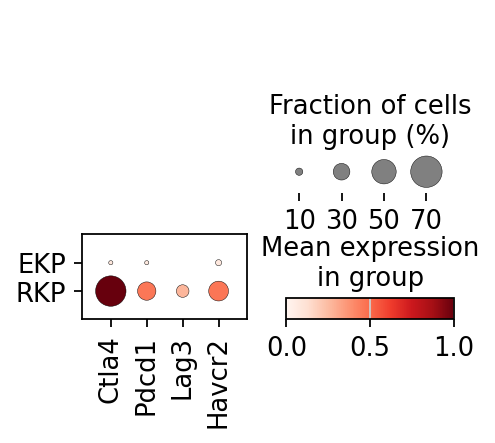

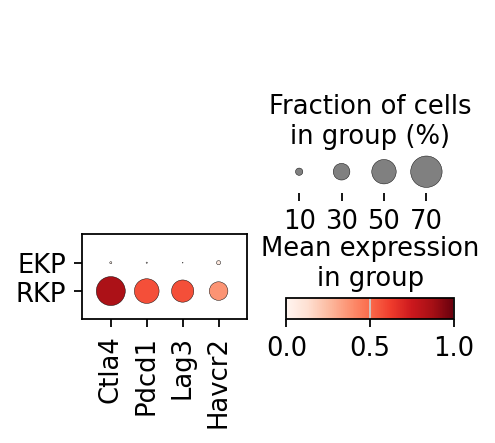

In [86]:
sc.pl.dotplot(adata[adata.obs['celltype']=='Cd4 T cell'], ['Ctla4','Pdcd1','Lag3','Havcr2'], groupby='type', vmin=0, vmax=1)
sc.pl.dotplot(adata[adata.obs['celltype']=='Cd8 T cell'], ['Ctla4','Pdcd1','Lag3','Havcr2'], groupby='type', vmin=0, vmax=1)

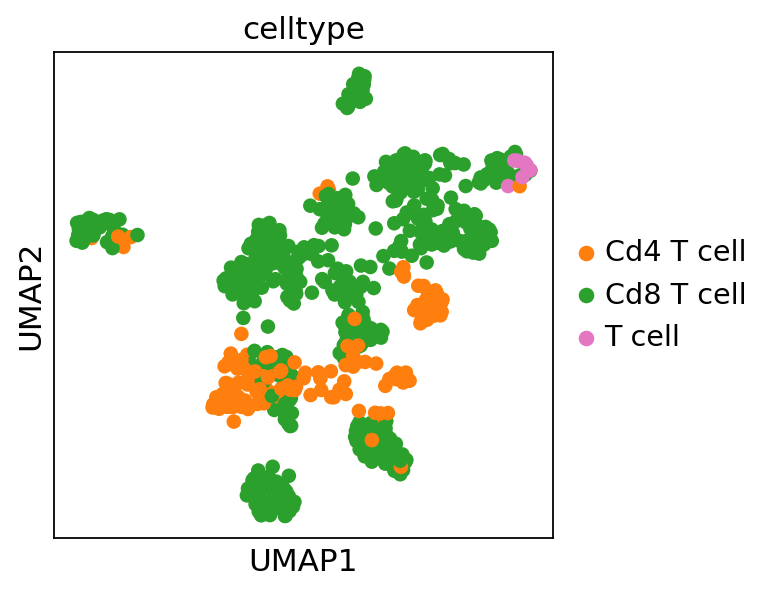

In [84]:
sc.pl.umap(adata, color=['celltype'])

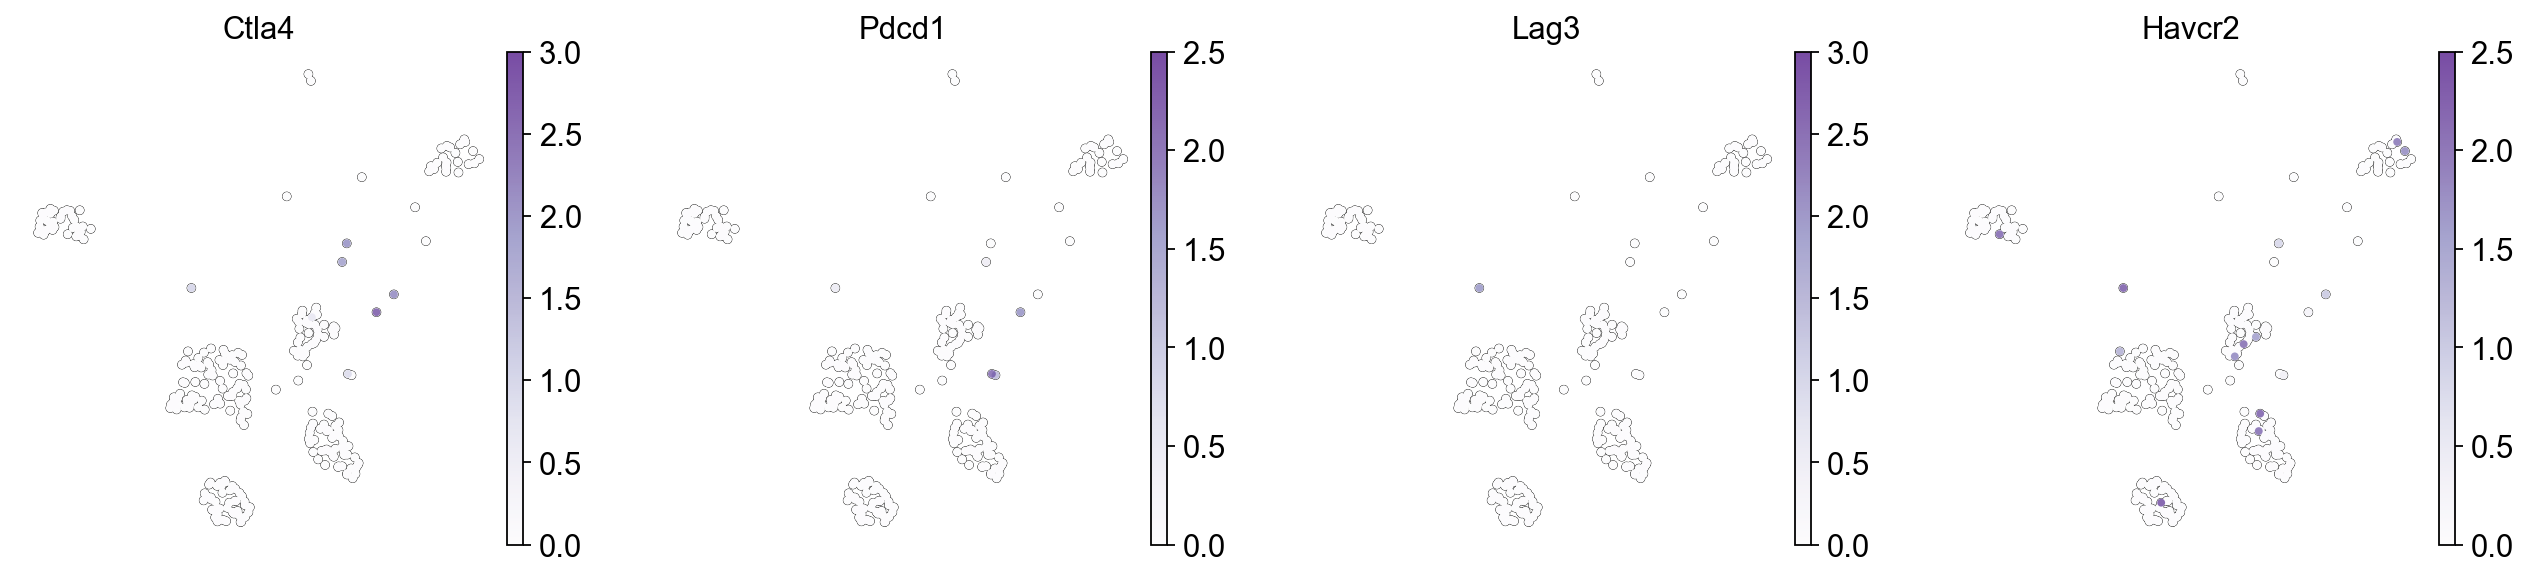

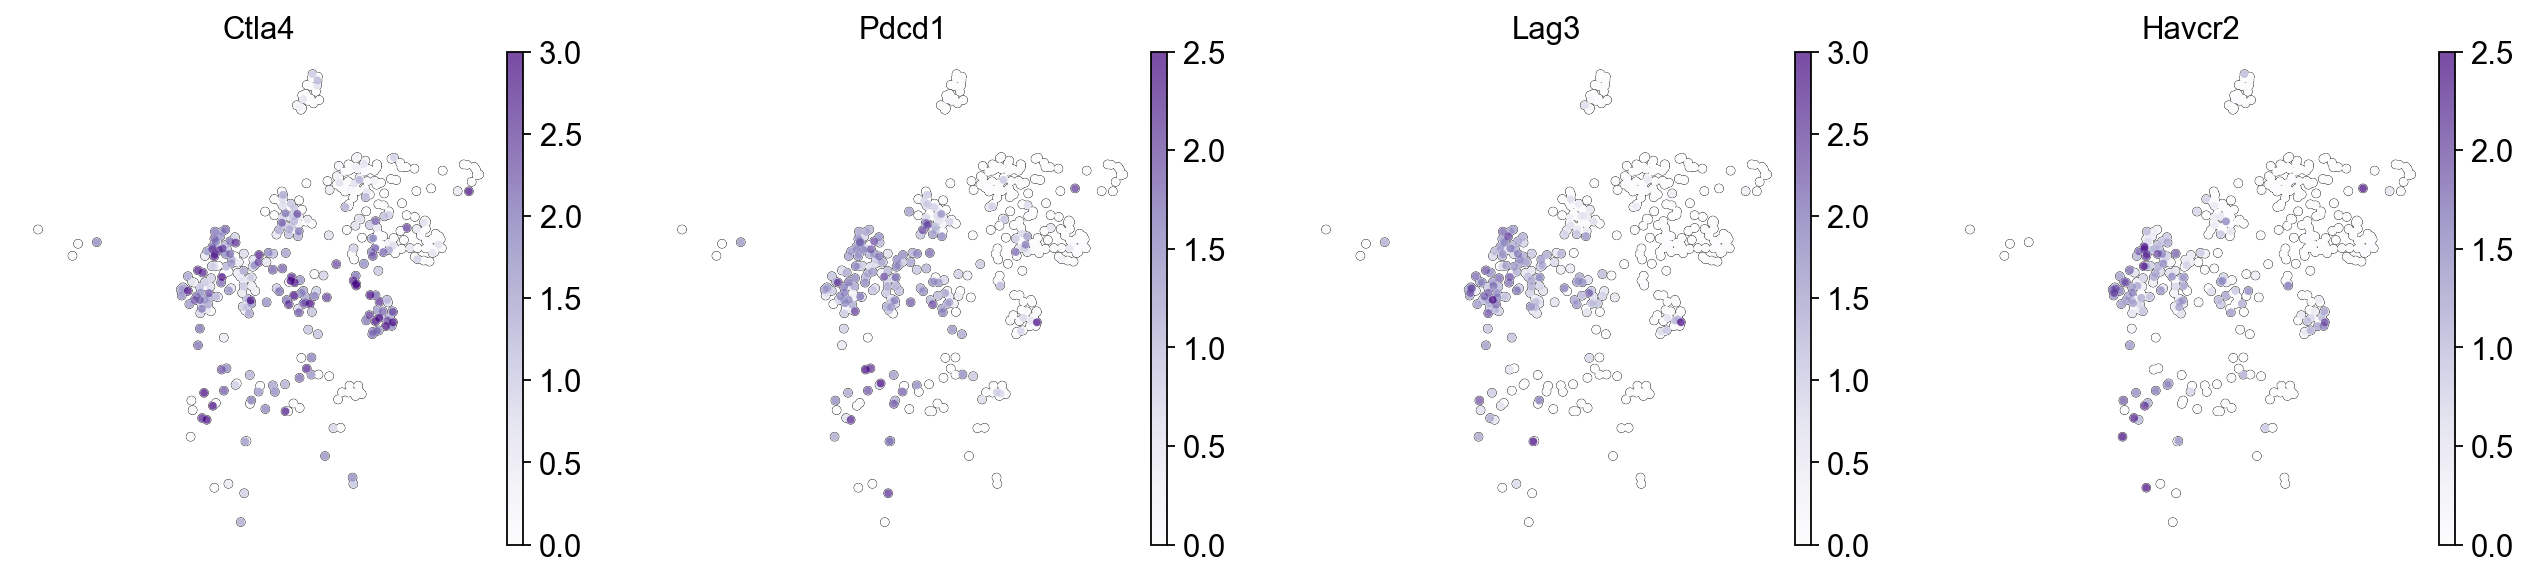

In [27]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=Texcell_geneset,legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05),vmax=(3,2.5,3,2.5), size=50,cmap='Purples', save='_EKP_Tcell_exT_markers.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=Texcell_geneset,legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05),vmax=(3,2.5,3,2.5), size=50,cmap='Purples', save='_RKP_Tcell_exT_markers.pdf')

In [20]:
adata.obs['celltype']

AAACGCTCAGCTATAC-1-0    Cd8 T cell
AAAGAACCAACGTTAC-1-0    Cd8 T cell
AAAGAACCAGATCACT-1-0    Cd4 T cell
AAAGAACGTTCTAACG-1-0    Cd8 T cell
AACAAGAGTATGAGCG-1-0    Cd4 T cell
                           ...    
TTTATGCCAAGATGTA-1-1    Cd4 T cell
TTTCACAAGGGAGGTG-1-1    Cd8 T cell
TTTCACATCGTTCCTG-1-1    Cd8 T cell
TTTCCTCGTTAAGAAC-1-1    Cd8 T cell
TTTGTTGGTGAGTTTC-1-1    Cd8 T cell
Name: celltype, Length: 699, dtype: category
Categories (3, object): ['Cd4 T cell', 'Cd8 T cell', 'T cell']

In [89]:
df = pd.crosstab(adata.obs['celltype'], adata.obs['type'])
df

type        EKP  RKP
celltype            
Cd4 T cell   63   82
Cd8 T cell  215  331
T cell        0    8

# GSEA

In [131]:
#for fGSEA
sc.tl.rank_genes_groups(adata, groupby='type', method='wilcoxon', use_raw=True,  key_added = "EKP_RKP_Tcell_rank_fgsea")
result = adata.uns['EKP_RKP_Tcell_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("D:/KP/EKP_RKP/EKP_RKP_Tcell_fgsea.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['EKP_RKP_Tcell_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [6]:
#for fGSEA
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon', use_raw=True,  key_added = "Leiden_Tcell_rank_fgsea")
result = adata.uns['Leiden_Tcell_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("D:/KP/EKP_RKP/Leiden_Tcell_rank_fgsea.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['Leiden_Tcell_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [92]:
#for fGSEA in cd4 T cell
adata_cd4 = adata[adata.obs['celltype']=='Cd4 T cell']
sc.tl.rank_genes_groups(adata_cd4, groupby='type', method='wilcoxon', use_raw=True,  key_added = "Cd4_Tcell_rank_by_type_fgsea")
result = adata_cd4.uns['Cd4_Tcell_rank_by_type_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("/mnt/d/KP/EKP_RKP/Cd4_Tcell_rank_by_type_fgsea.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['Cd4_Tcell_rank_by_type_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [95]:
#for fGSEA in cd4 T cell
adata_cd8 = adata[adata.obs['celltype']=='Cd8 T cell']
sc.tl.rank_genes_groups(adata_cd8, groupby='type', method='wilcoxon', use_raw=True,  key_added = "Cd8_Tcell_rank_by_type_fgsea")
result = adata_cd8.uns['Cd8_Tcell_rank_by_type_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("/mnt/d/KP/EKP_RKP/Cd8_Tcell_rank_by_type_fgsea.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['Cd8_Tcell_rank_by_type_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


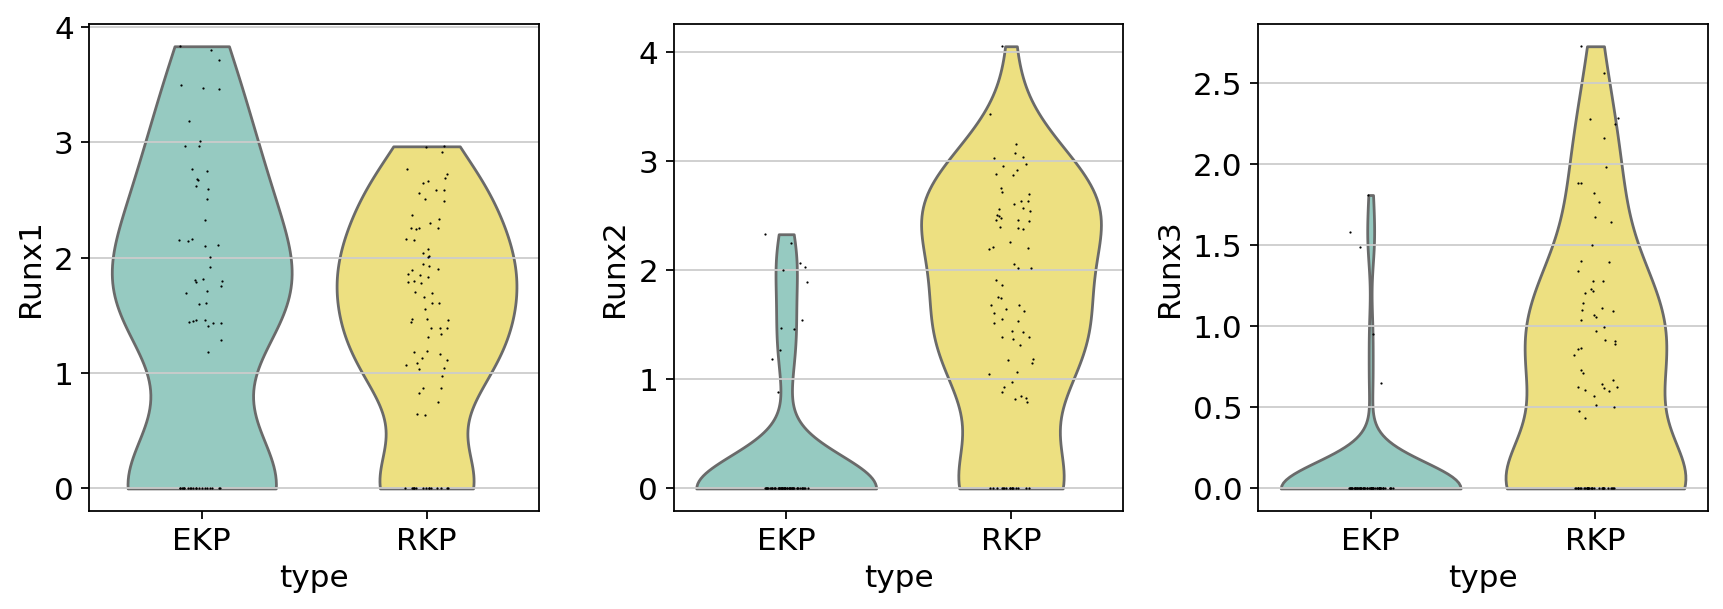

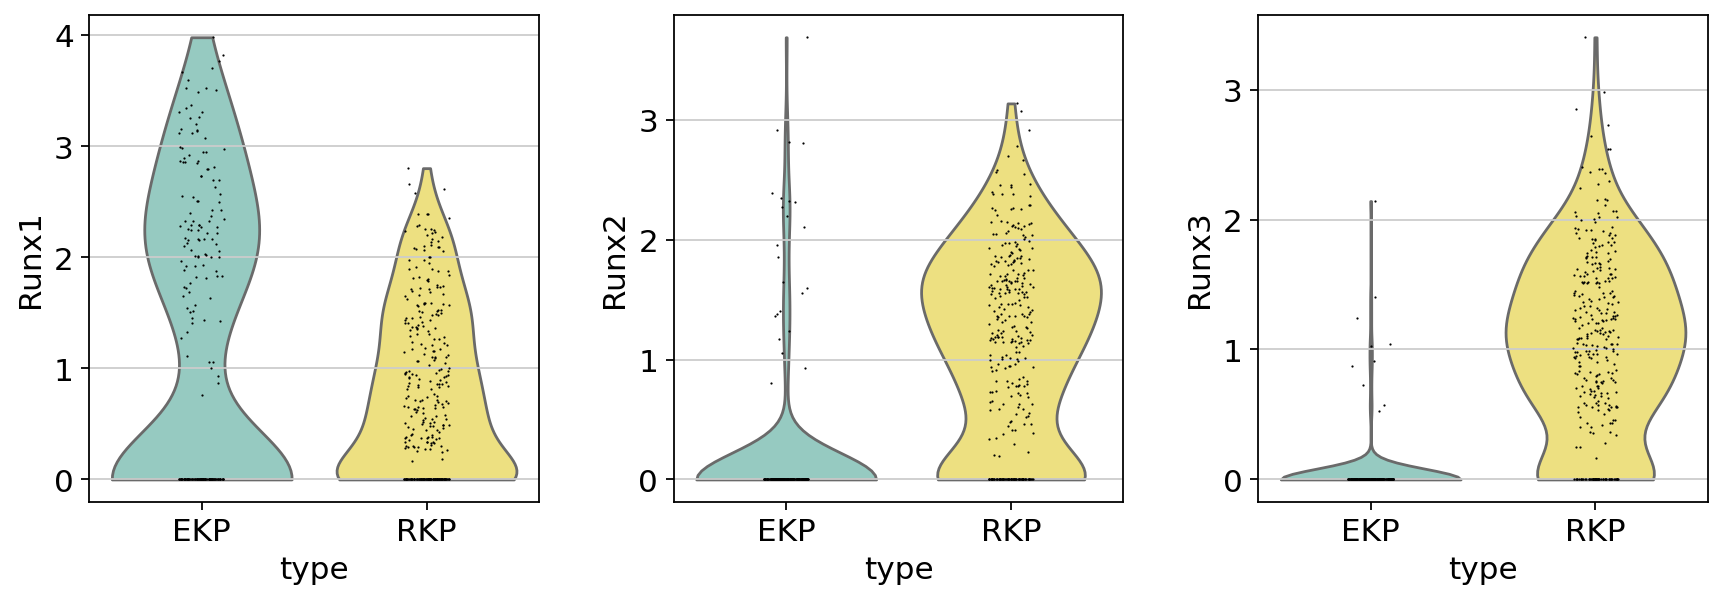

In [76]:
sc.pl.violin(adata[adata.obs['celltype']=='Cd4 T cell'], ['Runx1','Runx2','Runx3'], groupby='type')#, save='_Tcell_Ctla4,Pdcd1,Lag3,Havcr2_by_genotype.pdf')
sc.pl.violin(adata[adata.obs['celltype']=='Cd8 T cell'], ['Runx1','Runx2','Runx3'], groupby='type')#, save='_Tcell_Ctla4,Pdcd1,Lag3,Havcr2_by_genotype.pdf')

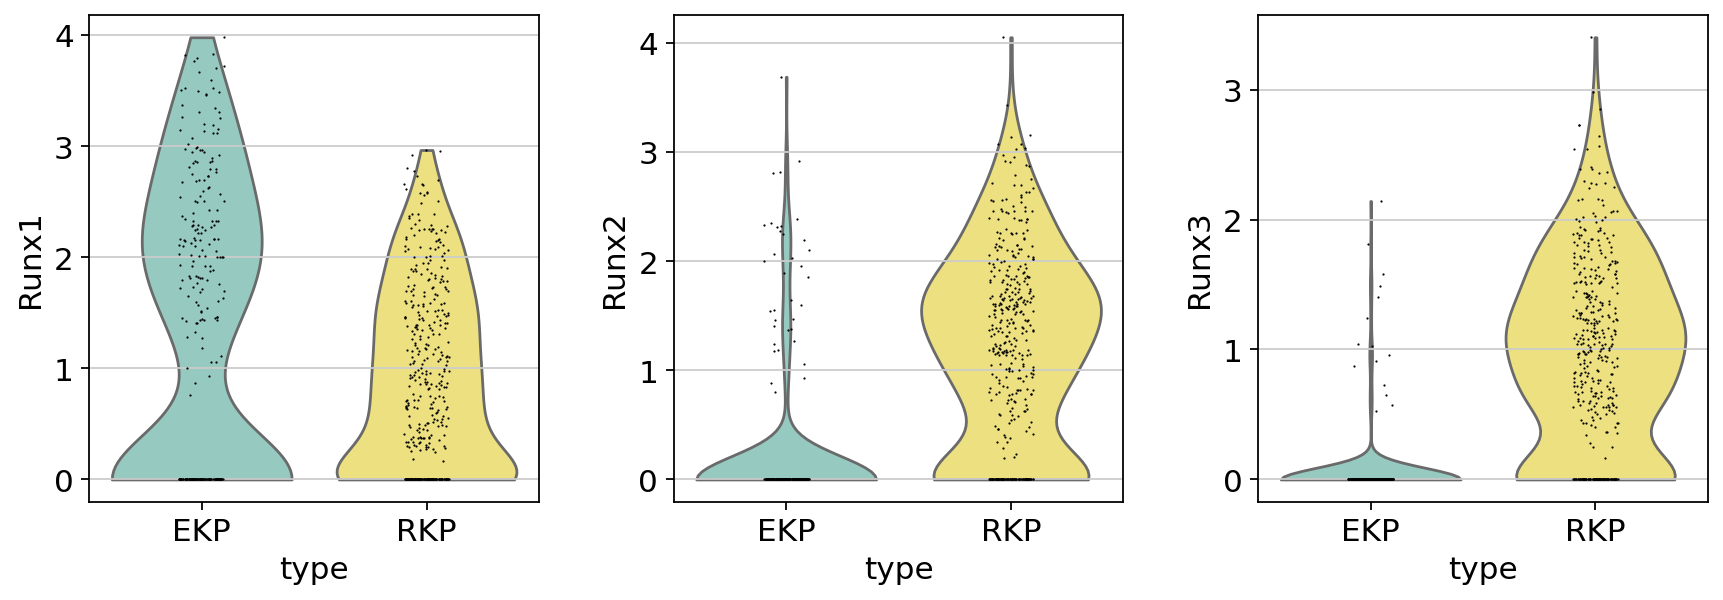

In [11]:
sc.pl.violin(adata, ['Runx1','Runx2','Runx3'], groupby='type', save='_Tcell_Runx1,Runx2,Runx3_by_genotype.pdf')

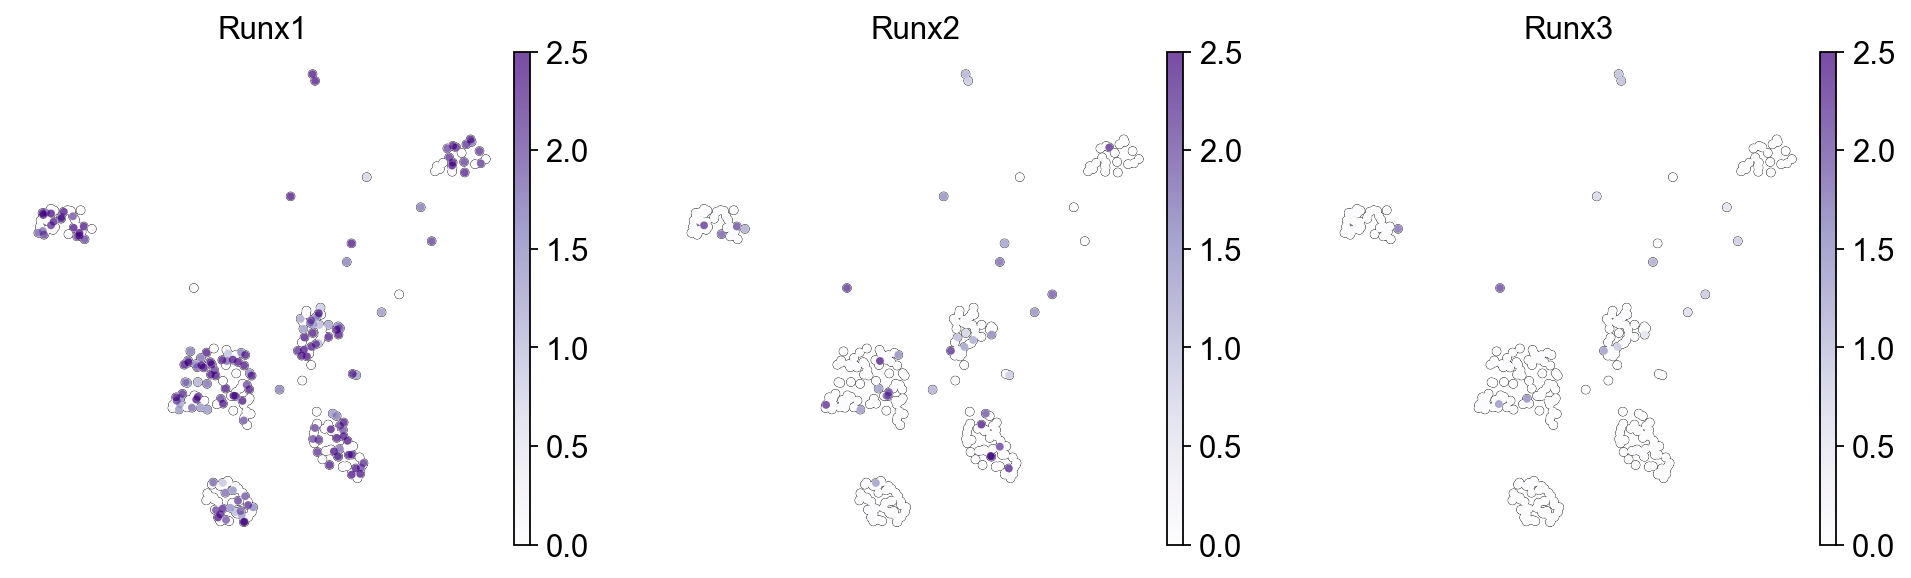

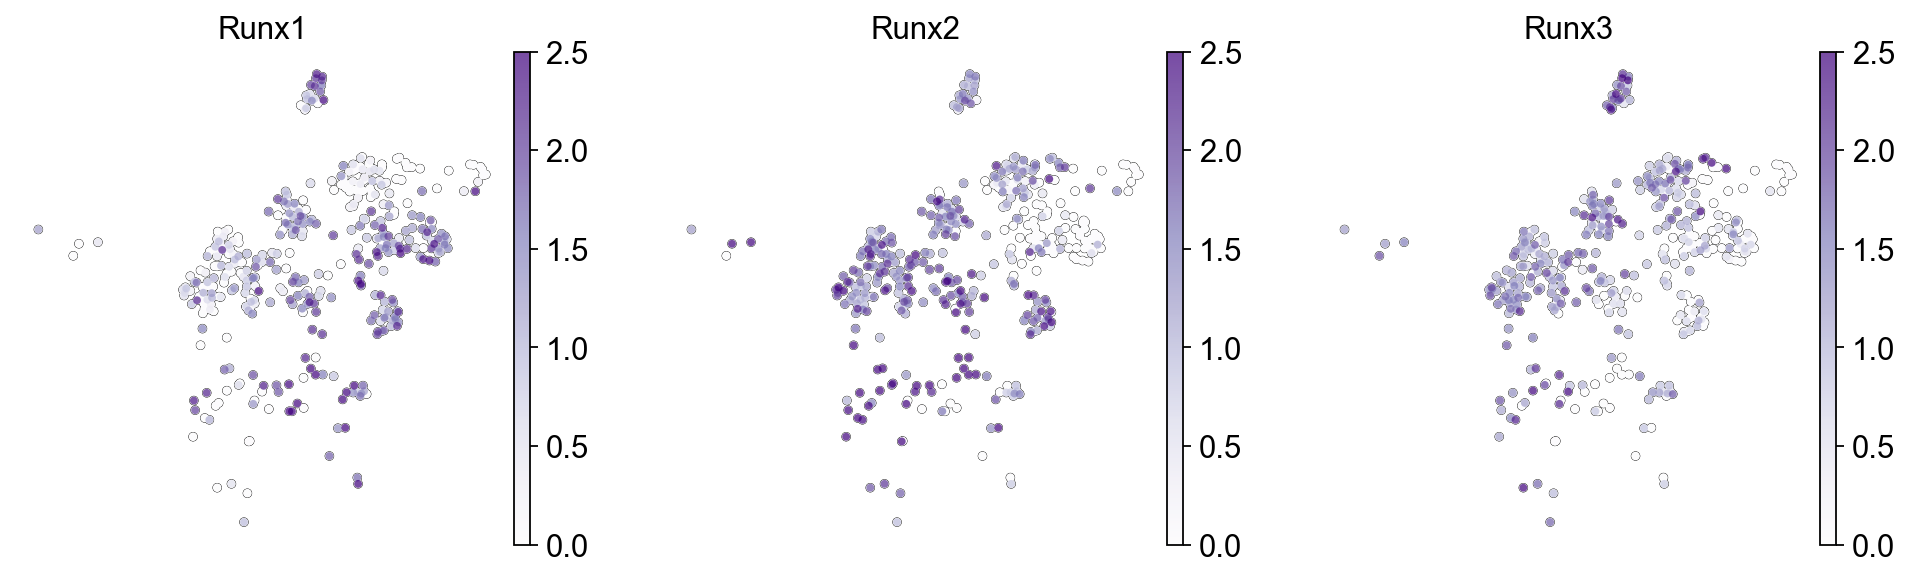

In [15]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['Runx1','Runx2','Runx3'],legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05),vmax=[2.5,2.5,2.5], size=50,cmap='Purples')#, save='_EKP_Tcell_exT_markers.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['Runx1','Runx2','Runx3'],legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05),vmax=[2.5,2.5,2.5], size=50,cmap='Purples')#, save='_RKP_Tcell_exT_markers.pdf')

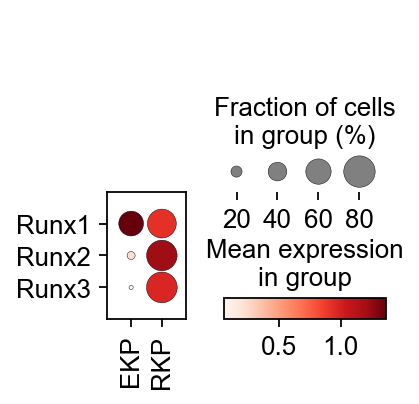

In [13]:
sc.pl.dotplot(adata, ['Runx1','Runx2','Runx3'], groupby='type',  swap_axes=True)#, save='_T_cell_exT_markers_by_genotype.pdf')

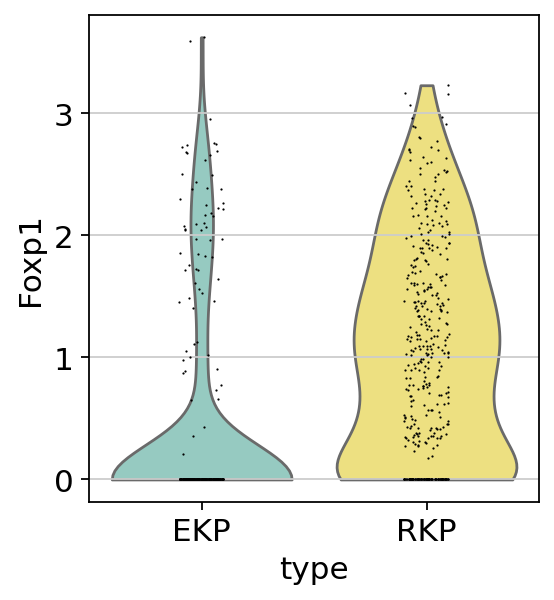

In [30]:
sc.pl.violin(adata, ['Foxp1'], groupby='type', save='_Tcell_Foxp1_by_genotype.pdf')

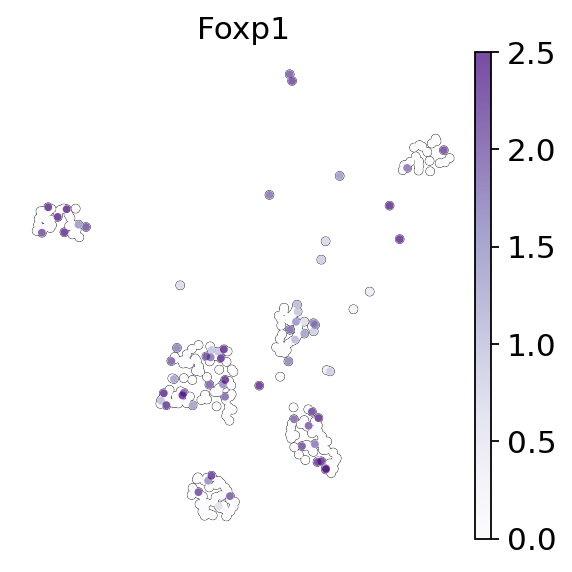

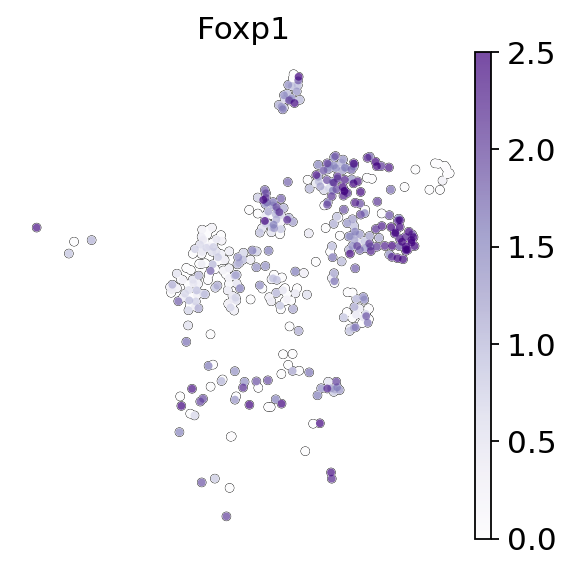

In [17]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['Foxp1'],legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05),vmax=[2.5,2.5,2.5], size=50,cmap='Purples')#, save='_EKP_Tcell_exT_markers.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['Foxp1'],legend_loc='right margin', frameon=False, vmin=0,add_outline=True, outline_width=(0.05,0.05),vmax=[2.5,2.5,2.5], size=50,cmap='Purples')#, save='_RKP_Tcell_exT_markers.pdf')

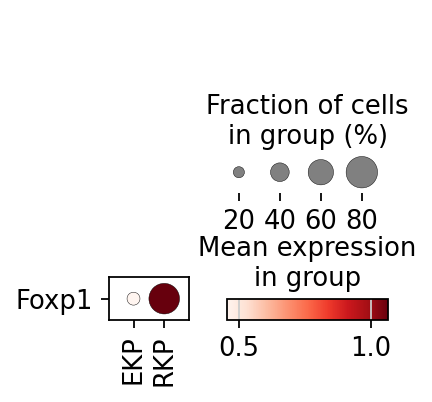

In [22]:
sc.pl.dotplot(adata, ['Foxp1'], groupby='type',  swap_axes=True)#, save='_T_cell_exT_markers_by_genotype.pdf')

In [11]:
adata.obs['celltype']

AAACGCTCAGCTATAC-1-0    Cd8 T cell
AAAGAACCAACGTTAC-1-0    Cd8 T cell
AAAGAACCAGATCACT-1-0    Cd4 T cell
AAAGAACGTTCTAACG-1-0    Cd8 T cell
AACAAGAGTATGAGCG-1-0    Cd4 T cell
                           ...    
TTTATGCCAAGATGTA-1-1    Cd4 T cell
TTTCACAAGGGAGGTG-1-1    Cd8 T cell
TTTCACATCGTTCCTG-1-1    Cd8 T cell
TTTCCTCGTTAAGAAC-1-1    Cd8 T cell
TTTGTTGGTGAGTTTC-1-1    Cd8 T cell
Name: celltype, Length: 699, dtype: category
Categories (3, object): ['Cd4 T cell', 'Cd8 T cell', 'T cell']

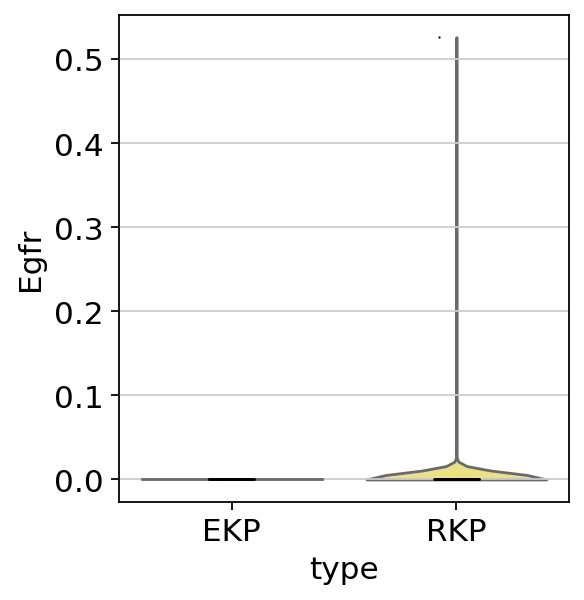

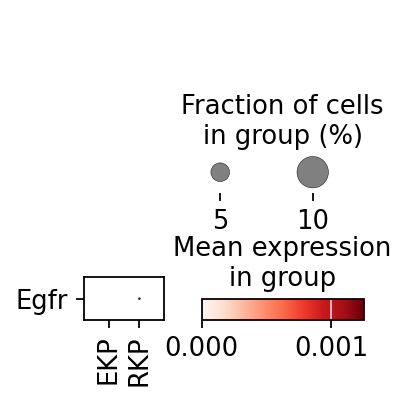

In [14]:
sc.pl.violin(adata, ['Egfr'], groupby='type')#, save='_Tcell_Foxp1_by_genotype.pdf')
sc.pl.dotplot(adata, ['Egfr'], groupby='type',  swap_axes=True)#, save='_T_cell_exT_markers_by_genotype.pdf')

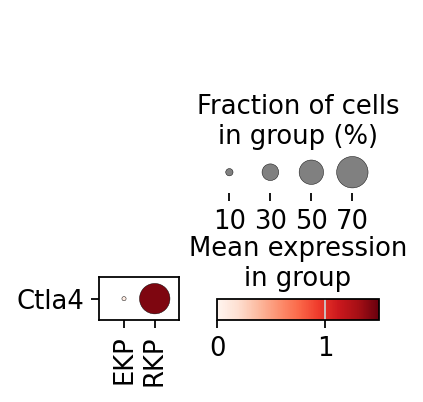

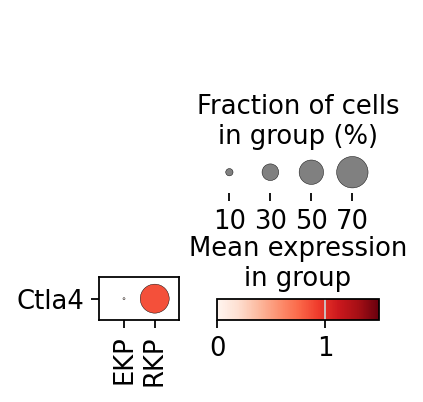

In [10]:
sc.pl.dotplot(adata[adata.obs['celltype']=='Cd4 T cell'], ['Ctla4'], groupby='type',vmin=0, vmax=1.5,  swap_axes=True, save='_CD4T_cell_Ctla4_by_genotype.pdf')
sc.pl.dotplot(adata[adata.obs['celltype']=='Cd8 T cell'], ['Ctla4'], groupby='type',vmin=0, vmax=1.5,  swap_axes=True, save='_CD8T_cell_Ctla4_by_genotype.pdf')

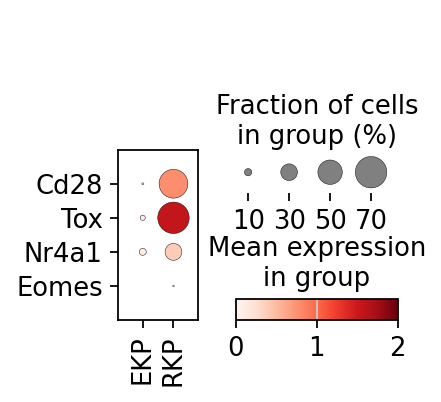

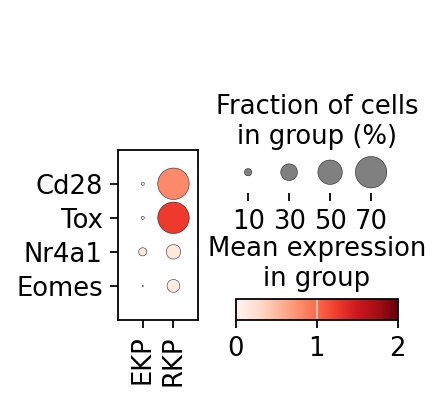

In [23]:
sc.pl.dotplot(adata[adata.obs['celltype']=='Cd4 T cell'], ['Cd28','Tox','Nr4a1','Eomes'], groupby='type',vmin=0, vmax=2,dot_max=0.7,  swap_axes=True)#, save='_CD4T_cell_Ctla4_by_genotype.pdf')
sc.pl.dotplot(adata[adata.obs['celltype']=='Cd8 T cell'], ['Cd28','Tox','Nr4a1','Eomes'], groupby='type',vmin=0, vmax=2,dot_max=0.7,  swap_axes=True)#, save='_CD4T_cell_Ctla4_by_genotype.pdf')

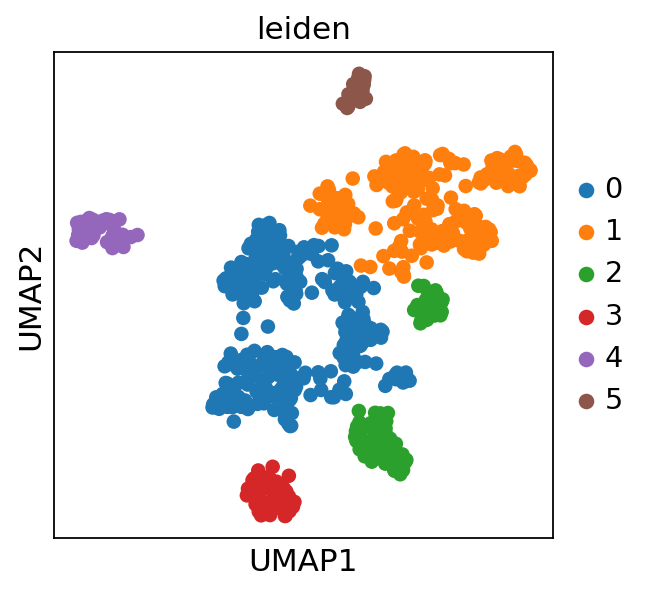

In [25]:
sc.pl.umap(adata, color='leiden')

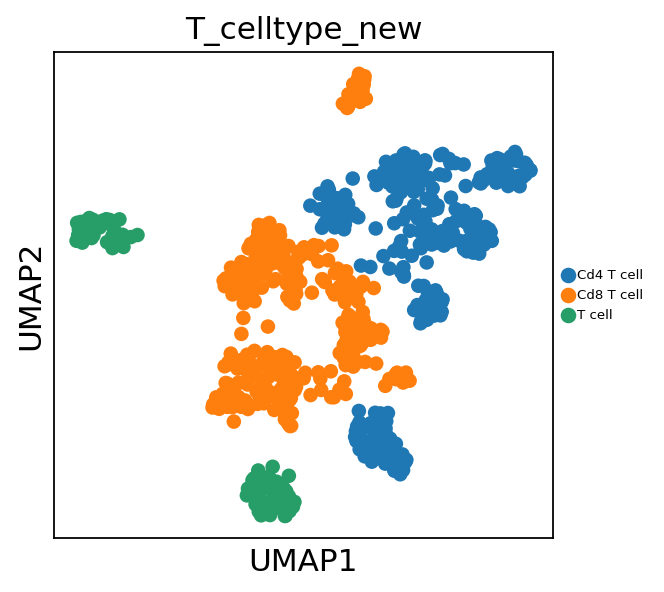

In [55]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'T cell':      ['3','4'],
             'Cd8 T cell': ['0','5'],
             'Cd4 T cell': ['1','2'],
             
            }

# Initialize empty column in cell metadata
adata.obs['T_celltype_new'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.leiden).isin(cell_dict[i])
    adata.obs.loc[ind,'T_celltype_new'] = i

sc.pl.umap(adata, color=['T_celltype_new'], legend_loc='right margin', legend_fontsize=6)#, save='_Immune_cells_by_celltype.pdf')


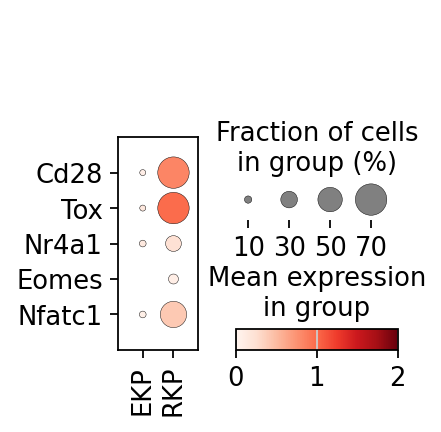

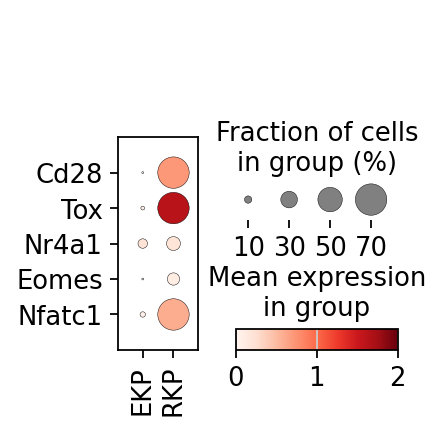

In [58]:
sc.pl.dotplot(adata[adata.obs['T_celltype_new']=='Cd4 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1'], groupby='type',vmin=0, vmax=2,dot_max=0.7,  swap_axes=True, save='_CD4T_cell_PD1_regulators_by_genotype.pdf')
sc.pl.dotplot(adata[adata.obs['T_celltype_new']=='Cd8 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1'], groupby='type',vmin=0, vmax=2,dot_max=0.7,  swap_axes=True, save='_CD8T_cell_PD1_regulators_by_genotype.pdf')

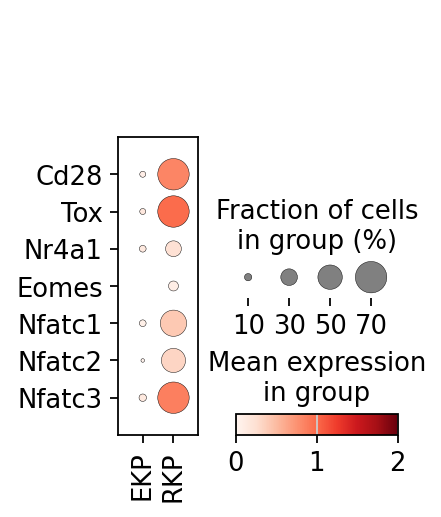

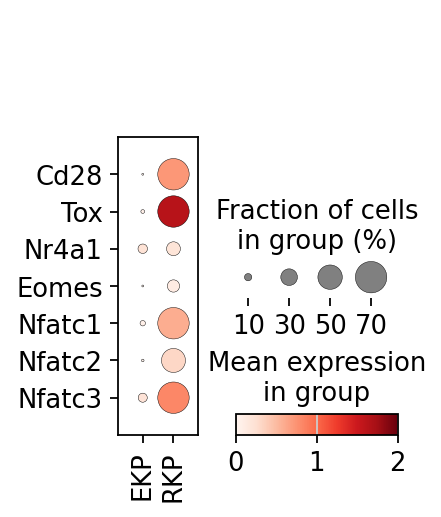

In [80]:
sc.pl.dotplot(adata[adata.obs['T_celltype_new']=='Cd4 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1','Nfatc2','Nfatc3'], groupby='type',vmin=0, vmax=2,dot_max=0.7,  swap_axes=True)#, save='_CD4T_cell_PD1_regulators_by_genotype.pdf')
sc.pl.dotplot(adata[adata.obs['T_celltype_new']=='Cd8 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1','Nfatc2','Nfatc3'], groupby='type',vmin=0, vmax=2,dot_max=0.7,  swap_axes=True, save='_CD8T_cell_PD1_regulators_by_genotype_1.pdf')

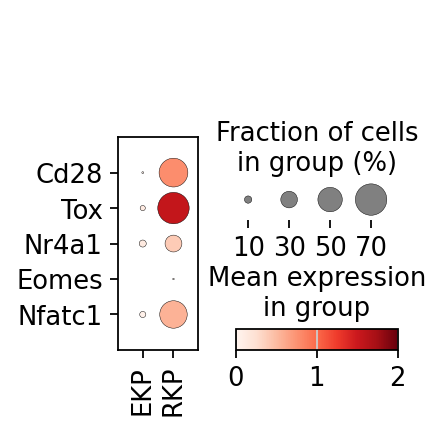

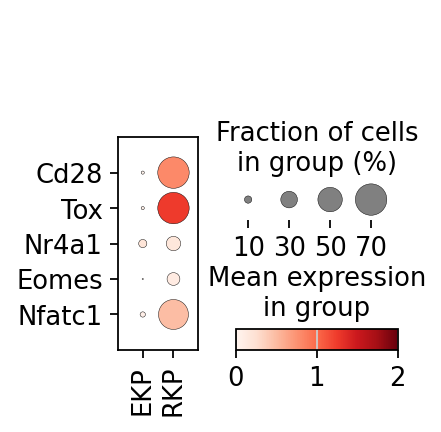

In [57]:
sc.pl.dotplot(adata[adata.obs['celltype']=='Cd4 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1'], groupby='type',vmin=0, vmax=2,dot_max=0.7,  swap_axes=True)#, save='_CD4T_cell_Ctla4_by_genotype.pdf')
sc.pl.dotplot(adata[adata.obs['celltype']=='Cd8 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1'], groupby='type',vmin=0, vmax=2,dot_max=0.7,  swap_axes=True)#, save='_CD4T_cell_Ctla4_by_genotype.pdf')

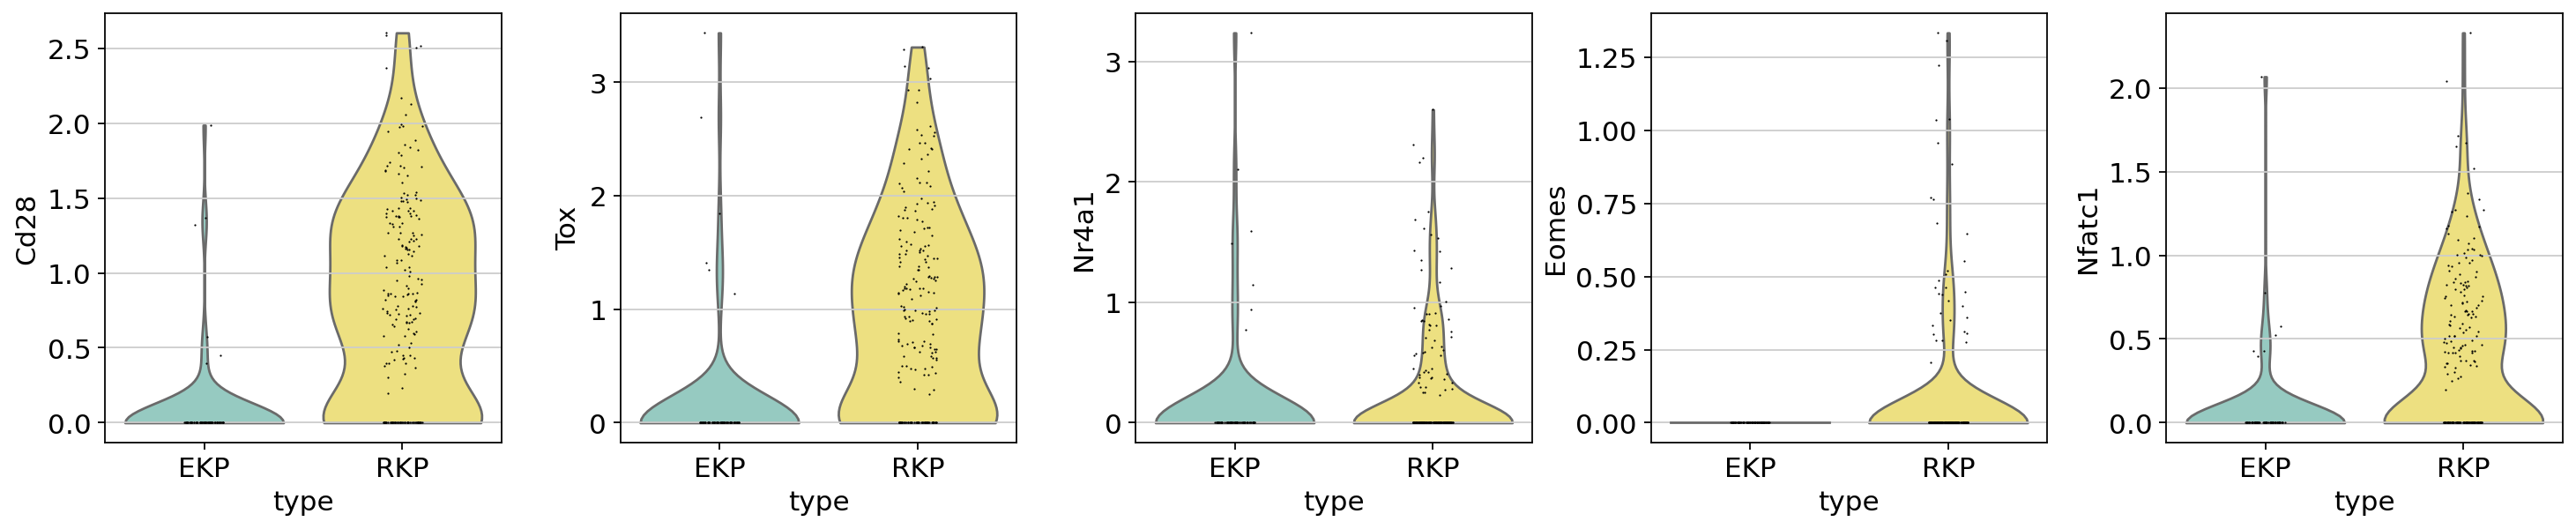

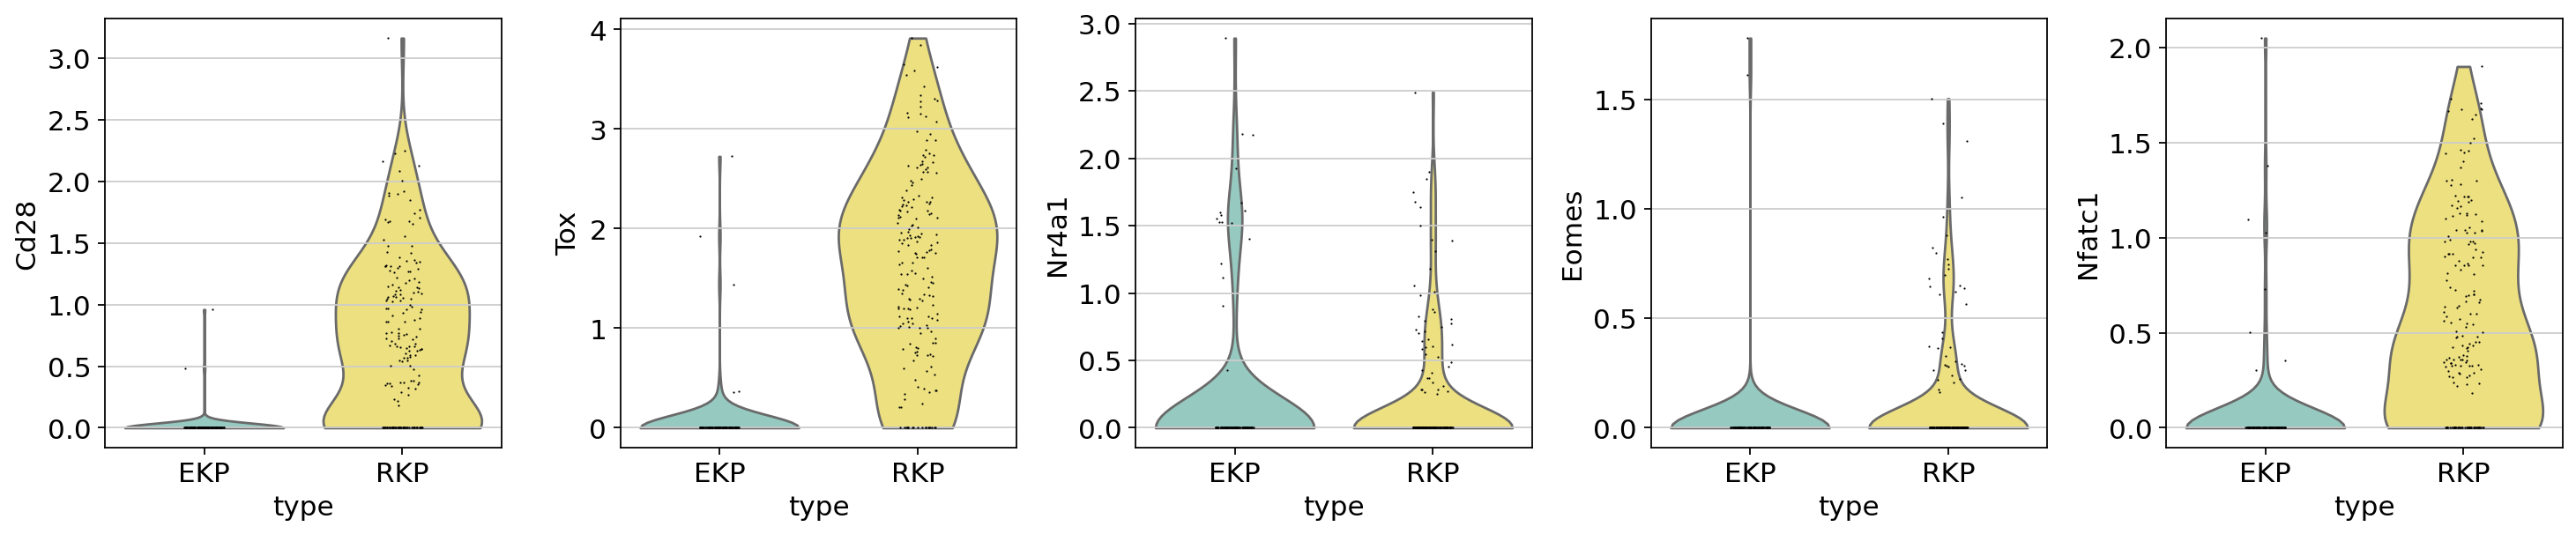

In [59]:
sc.pl.violin(adata[adata.obs['T_celltype_new']=='Cd4 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1'], groupby='type', save='_CD4Tcell_PD1_regulators_by_genotype.pdf')
sc.pl.violin(adata[adata.obs['T_celltype_new']=='Cd8 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1'], groupby='type', save='_CD8Tcell_PD1_regulators_by_genotype.pdf')

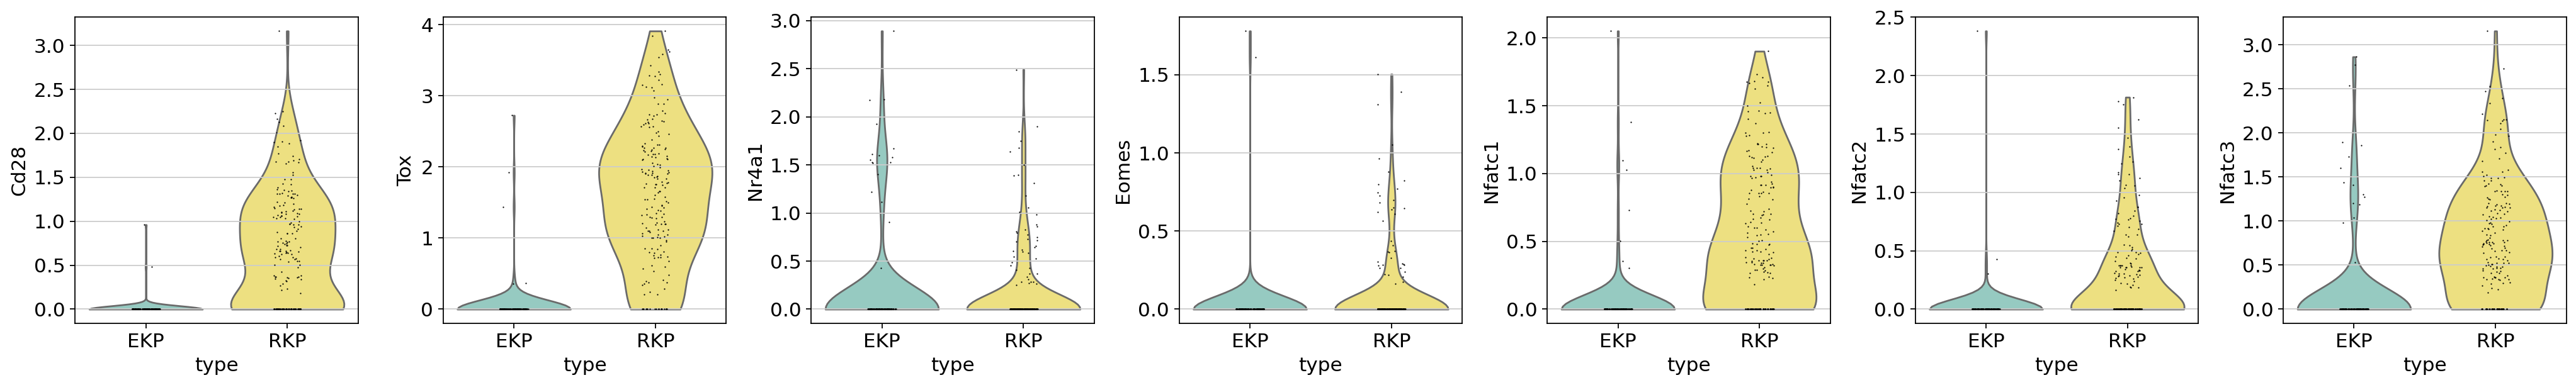

In [81]:
sc.pl.violin(adata[adata.obs['T_celltype_new']=='Cd8 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1','Nfatc2','Nfatc3'], groupby='type', save='_CD8Tcell_PD1_regulators_by_genotype_1.pdf')

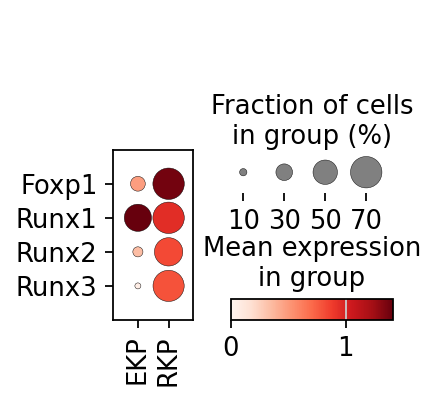

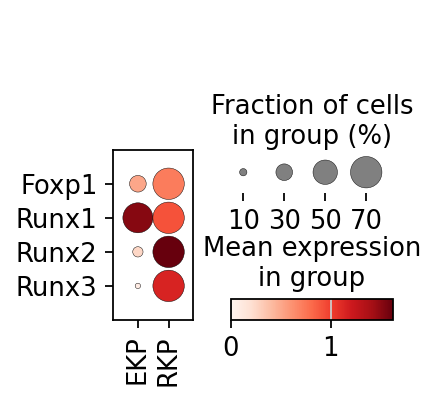

In [33]:
sc.pl.dotplot(adata[adata.obs['T_celltype_new']=='Cd4 T cell'], ['Foxp1','Runx1','Runx2','Runx3'], groupby='type',vmin=0, dot_max=0.7,  swap_axes=True)#, save='_CD4T_cell_Ctla4_by_genotype.pdf')
sc.pl.dotplot(adata[adata.obs['T_celltype_new']=='Cd8 T cell'], ['Foxp1','Runx1','Runx2','Runx3'], groupby='type',vmin=0, dot_max=0.7,  swap_axes=True)#, save='_CD4T_cell_Ctla4_by_genotype.pdf')

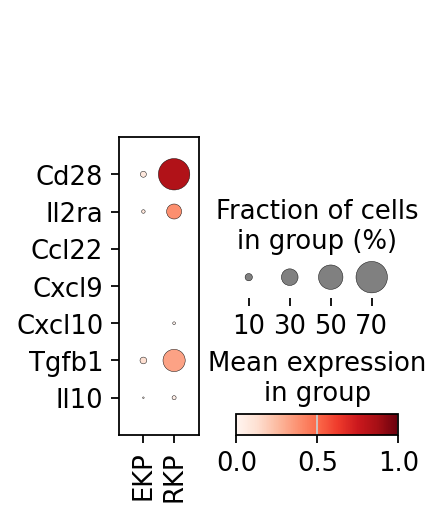

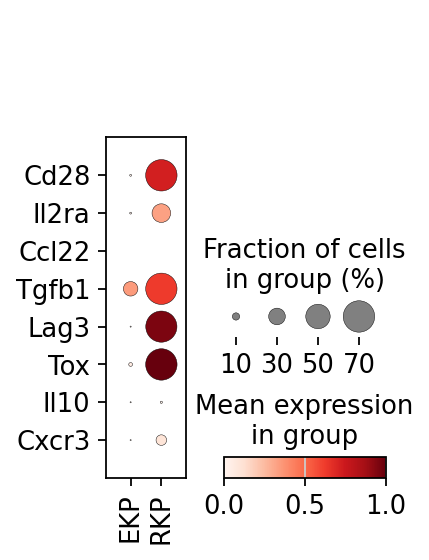

In [75]:
sc.pl.dotplot(adata[adata.obs['T_celltype_new']=='Cd4 T cell'], ['Cd28','Il2ra','Ccl22','Cxcl9','Cxcl10','Tgfb1','Il10'], groupby='type',vmin=0,vmax=1, dot_max=0.7,  swap_axes=True, save='_CD4T_cell_Treg_related_by_genotype.pdf')
sc.pl.dotplot(adata[adata.obs['T_celltype_new']=='Cd8 T cell'], ['Cd28','Il2ra','Ccl22','Tgfb1','Lag3','Tox','Il10','Cxcr3'], groupby='type',vmin=0,vmax=1, dot_max=0.7,  swap_axes=True)#, save='_CD4T_cell_Ctla4_by_genotype.pdf')

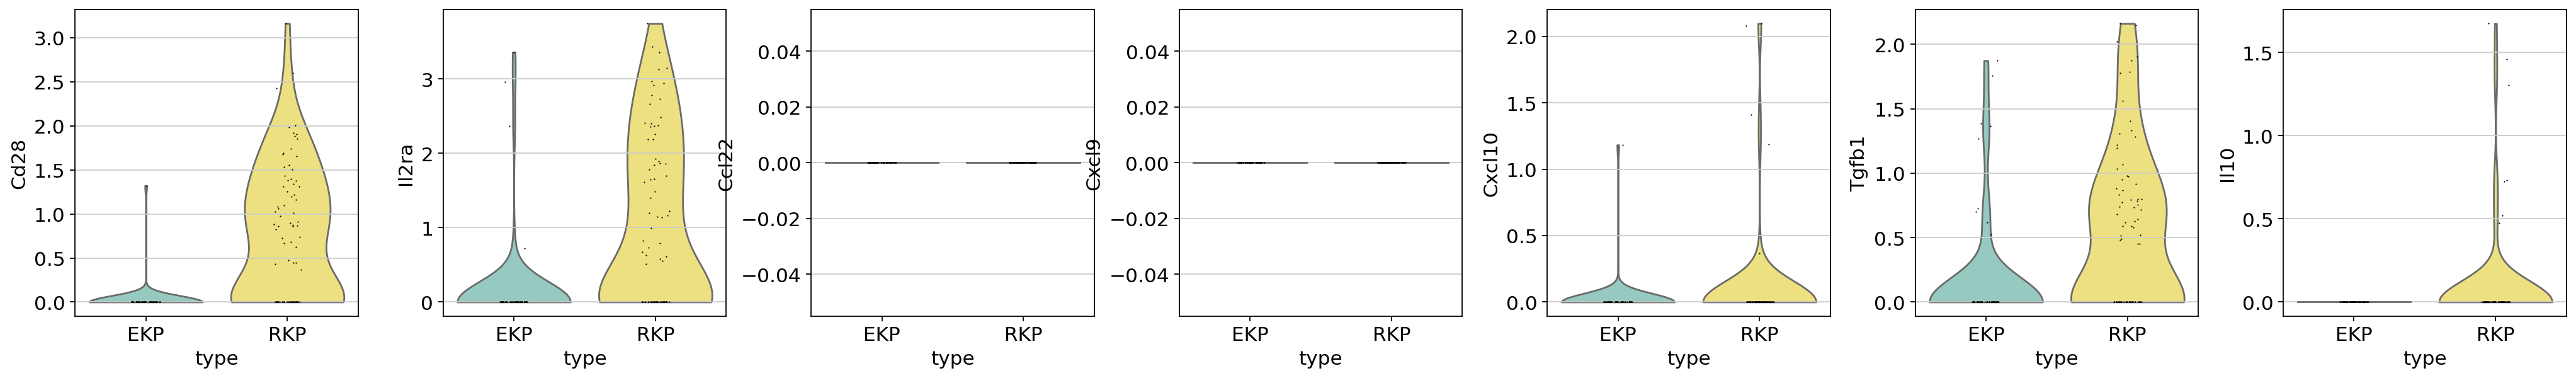

In [78]:
sc.pl.violin(adata[adata.obs['celltype']=='Cd4 T cell'], ['Cd28','Il2ra','Ccl22','Cxcl9','Cxcl10','Tgfb1','Il10'], groupby='type', save='_CD4T_cell_Treg_related_by_genotype.pdf')
#sc.pl.violin(adata[adata.obs['celltype']=='Cd8 T cell'], ['Cd28','Tox','Nr4a1','Eomes','Nfatc1'], groupby='type')#, save='_Tcell_Foxp1_by_genotype.pdf')

# P-Value

In [23]:
sc.tl.rank_genes_groups(adata, 'type', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [25]:
result_T_ekprkp = adata.uns['rank_genes_groups']
groups_T_ekprkp = result_T_ekprkp['names'].dtype.names
pval_table_T_ekprkp = pd.DataFrame(
            {group + '_' + key[:2]: result_T_ekprkp[key][group]
            for group in groups_T_ekprkp for key in ['names', 'pvals_adj']})
pval_table_T_ekprkp

EKP_na         EKP_pv   RKP_na         RKP_pv
0        Basp1   7.760260e-89     Gphn  9.319232e-160
1      Pik3ap1   1.725391e-69    Cmss1  4.053235e-161
2        Cxcl2   1.325379e-66    Skap1  5.432670e-195
3        Neat1   3.564056e-69    Mbnl1  8.502786e-162
4        Ero1l   3.786177e-63   Tmsb10  1.900940e-159
...        ...            ...      ...            ...
16457   Tmsb10  1.900940e-159    Ero1l   3.786177e-63
16458    Mbnl1  8.502786e-162    Neat1   3.564056e-69
16459    Skap1  5.432670e-195    Cxcl2   1.325379e-66
16460    Cmss1  4.053235e-161  Pik3ap1   1.725391e-69
16461     Gphn  9.319232e-160    Basp1   7.760260e-89

[16462 rows x 4 columns]

In [29]:
pval_table_T_ekprkp.loc[pval_table_T_ekprkp['RKP_na'].isin(['Runx1','Runx2','Runx3'])]

EKP_na        EKP_pv RKP_na        RKP_pv
137    1700017B05Rik  5.796504e-18  Runx3  3.728574e-84
341           Gpr141  1.047416e-07  Runx2  1.357857e-50
16045        Ndufb10  5.035548e-44  Runx1  1.995271e-06

# CD4 T P-Value

In [38]:
CD4T = adata[adata.obs['T_celltype_new']=='Cd4 T cell']

In [39]:
sc.tl.rank_genes_groups(CD4T, 'type', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [40]:
result_CD4T_ekprkp = CD4T.uns['rank_genes_groups']
groups_CD4T_ekprkp = result_CD4T_ekprkp['names'].dtype.names
pval_table_CD4T_ekprkp = pd.DataFrame(
            {group + '_' + key[:2]: result_CD4T_ekprkp[key][group]
            for group in groups_CD4T_ekprkp for key in ['names', 'pvals_adj']})
pval_table_CD4T_ekprkp

EKP_na        EKP_pv    RKP_na        RKP_pv
0         Basp1  2.446345e-17      Gphn  1.179095e-48
1        Malat1  4.811447e-20  AY036118  7.262845e-83
2          Zeb2  9.525192e-16     Cmss1  6.185375e-46
3         Neat1  2.739280e-15    Tmsb10  3.514443e-47
4         Cxcl2  6.651322e-14    Rps15a  8.610934e-45
...         ...           ...       ...           ...
16457    Rps15a  8.610934e-45     Cxcl2  6.651322e-14
16458    Tmsb10  3.514443e-47     Neat1  2.739280e-15
16459     Cmss1  6.185375e-46      Zeb2  9.525192e-16
16460  AY036118  7.262845e-83    Malat1  4.811447e-20
16461      Gphn  1.179095e-48     Basp1  2.446345e-17

[16462 rows x 4 columns]

In [77]:
pval_table_CD4T_ekprkp.loc[pval_table_CD4T_ekprkp['RKP_na'].isin(['Cd28','Tox','Nr4a1','Eomes','Nfatc1', 'Il2ra','Ccl22','Cxcl9','Cxcl10','Tgfb1','Il10'])]

EKP_na    EKP_pv  RKP_na        RKP_pv
153      Fbxl5  0.001978    Cd28  3.330329e-28
372    Map3k20  0.064858     Tox  2.980809e-16
604      Mirt2  0.202953  Nfatc1  3.177346e-12
1609     Pqlc2  0.674836   Eomes  2.014106e-06
3199   Gm47093  1.000000   Il2ra  1.126935e-03
3902     Masp2  1.000000   Tgfb1  5.752739e-03
5666     Smug1  0.952373  Cxcl10  6.132133e-02
7817     Psat1  0.454697   Nr4a1  3.090398e-01
10423  Tmem108  0.088266    Il10  7.240546e-01
12250     Dexi  0.009068   Ccl22  1.000000e+00
13781    Ciao3  0.000279   Cxcl9  1.000000e+00

# CD8 P-Value

In [42]:
CD8T = adata[adata.obs['T_celltype_new']=='Cd8 T cell']

In [43]:
sc.tl.rank_genes_groups(CD8T, 'type', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [44]:
result_CD8T_ekprkp = CD8T.uns['rank_genes_groups']
groups_CD8T_ekprkp = result_CD8T_ekprkp['names'].dtype.names
pval_table_CD8T_ekprkp = pd.DataFrame(
            {group + '_' + key[:2]: result_CD8T_ekprkp[key][group]
            for group in groups_CD8T_ekprkp for key in ['names', 'pvals_adj']})
pval_table_CD8T_ekprkp

EKP_na        EKP_pv  RKP_na        RKP_pv
0       Basp1  6.777471e-44   Skap1  2.152953e-88
1       Ero1l  1.412963e-40   Cmss1  4.428528e-65
2       Mbnl2  2.301877e-42    Gphn  7.270596e-65
3       Fnip2  1.589245e-37  Ablim1  1.462593e-70
4       Neat1  5.273291e-43   Il2rb  1.600167e-68
...       ...           ...     ...           ...
16457   Il2rb  1.600167e-68   Neat1  5.273291e-43
16458  Ablim1  1.462593e-70   Fnip2  1.589245e-37
16459    Gphn  7.270596e-65   Mbnl2  2.301877e-42
16460   Cmss1  4.428528e-65   Ero1l  1.412963e-40
16461   Skap1  2.152953e-88   Basp1  6.777471e-44

[16462 rows x 4 columns]

In [82]:
pval_table_CD8T_ekprkp.loc[pval_table_CD8T_ekprkp['RKP_na'].isin(['Cd28','Tox','Nr4a1','Eomes','Nfatc1','Nfatc2','Nfatc3'])]

EKP_na        EKP_pv  RKP_na        RKP_pv
31       Il1rn  9.484540e-24     Tox  8.704544e-55
206       P4hb  4.581007e-08    Cd28  4.265728e-34
438    Slc20a1  6.605213e-04  Nfatc1  1.165284e-25
1070   Slc30a9  1.738479e-01  Nfatc3  3.220117e-14
1303    Kcnab1  2.857640e-01  Nfatc2  1.318836e-12
5650   Gm20470  7.016529e-01   Eomes  7.598339e-03
14035     Pmm2  1.088673e-07   Nr4a1  8.310007e-01